# Learner/Facilitator Guide for Machine Learning 101 for Financial Trading

# Topic 1 Overview of Machine Learnging Methodologies

## Install  Python Libraries

In [ ]:
!pip install yfinance
!pip install pyfolio
!pip install talib-binary

##1c)Import TA-Lib & Pyfolio

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

In [ ]:
!pip install Ta-Lib
import talib as ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.4/266.4 kB 11.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Ta-Lib: filename=TA_Lib-0.4.27-cp310-cp310-linux_x86_64.whl size=2246617 sha256=fc59947f9bd22e736c3ddf08ca8d42334c2801cbbfff6e29f9c7b4dd80411289
  Stored in directory: /root/.cache/pip/wheels/cc/d2/af/ede611220f2719d334f1232aa623df38fe124a4235c9447f71
Successfully built Ta-Lib


In [ ]:
!pip install pyfolio
import pyfolio as pf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88663 sha256=832ead5dd2498c1644e071c44a7b0e890cfdcb2ae0c59d19c6937259b3ad2021
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39762 sha256=399a1d29f2dca7fe9533556cd0a7d28813116459904e8d4dd5d7060f320f5a49
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

import yfinance as yf
import talib as ta
from statsmodels.tsa.stattools import adfuller

<ipython-input-5-df45635aedbe>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Read the Data

In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,17.370001,17.400000,17.150000,17.320000,12.874811,3582956
2017-01-04,17.280001,17.670000,17.280001,17.520000,13.023482,3821700
2017-01-05,17.790001,17.950001,17.700001,17.799999,13.231619,4977400
2017-01-06,17.990000,17.990000,17.620001,17.670000,13.134984,3515200
2017-01-09,17.650000,17.879999,17.650000,17.850000,13.268785,1815100
...,...,...,...,...,...,...
2023-07-11,31.129999,31.160000,30.889999,31.010000,31.010000,2938700
2023-07-12,31.049999,31.299999,30.950001,31.010000,31.010000,3676100
2023-07-13,31.290001,31.950001,31.240000,31.870001,31.870001,6316200


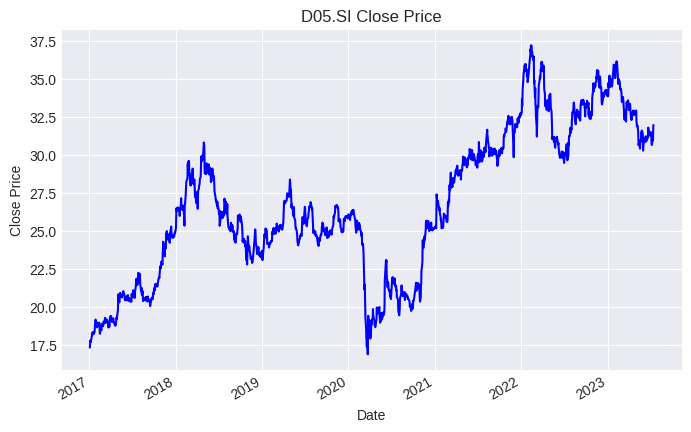

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

## Target

In [ ]:
# Create a column 'future_returns' with the calculation of
# percentage change
data['returns'] = data['Close'].pct_change().shift(-1)

# Create the signal column
data['signal'] = np.where(data['returns'] > 0, 1, 0)

data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,signal
Date,,,,,,,,
2017-01-03,17.370001,17.400000,17.150000,17.320000,12.874811,3582956,0.011547,1
2017-01-04,17.280001,17.670000,17.280001,17.520000,13.023482,3821700,0.015982,1
2017-01-05,17.790001,17.950001,17.700001,17.799999,13.231618,4977400,-0.007303,0
2017-01-06,17.990000,17.990000,17.620001,17.670000,13.134981,3515200,0.010187,1
2017-01-09,17.650000,17.879999,17.650000,17.850000,13.268785,1815100,0.007843,1


## Features

### RSI and ADX

Next, we will calculate the technical indicators, RSI and ADX. These can be done by using the `RSI` and `ADX` method of the `talib` library.

Syntax:
```python
import talib as ta
ta.RSI(data, timeperiod)
ta.ADX(data_high, data_low, data_open, timeperiod)
```


In [ ]:
# Create a column by the name RSI, and assign the RSI values to it
data['rsi'] = ta.RSI(data['Close'].values, timeperiod=14)

# Create a column by the name ADX, and assign the ADX values to it
data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

### Moving Average and Correlation

We will now create the simple moving average and rolling correlation of the close price. This can be done by using the `mean` and the `corr` method of the pandas library.

Syntax:
```python
DataFrame[column].rolling(window).mean()
DataFrame[column].rolling(window).corr()
```

**column:** The column to perform the operation on.<br>
**window:** The span of the rolling window.

We will calculate the daily moving average and correlation.

In [ ]:
# Create a column by the name sma, and assign SMA values to it
data['sma'] = data['Close'].rolling(window=14).mean()

# Create a column by the name corr, and assign the correlation
# values to it
data['corr'] = data['Close'].rolling(window=14).corr(data['sma'])

### Volatitity

In [ ]:
data['pct_change'] = data['Close'].pct_change()
data['volatility'] = data['pct_change'].rolling(window=14).std()*100
data['volatility2'] = data['pct_change'].rolling(window=14*2).std()*100

## Create X and y

Before creating the features (`X`) and target(`y`), we will drop the rows with any missing values.

In [ ]:
# Drop the missing values
data.dropna(inplace=True)

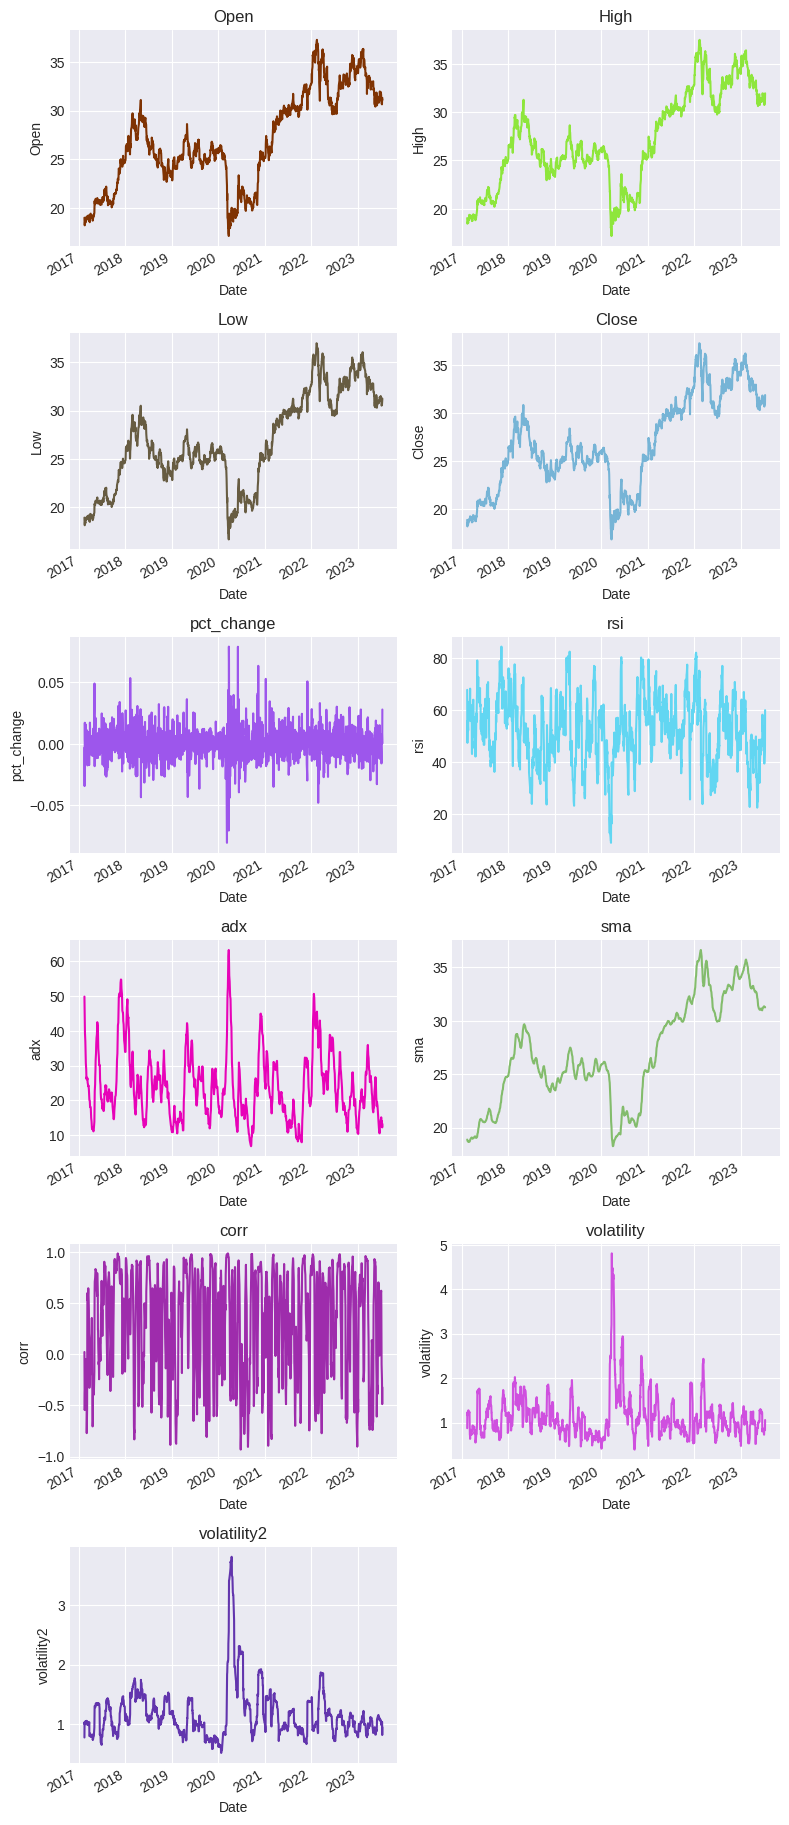

In [ ]:
# Target
y = data[['signal']].copy()

# Features
X = data[['Open','High','Low','Close','pct_change', 'rsi', 'adx', 'sma', 'corr', 'volatility','volatility2']].copy()

i=1

# Set number of rows in subplot
nrows = int(X.shape[1]+1/2)
for feature in X.columns:
    plt.subplot(nrows, 2, i)

    # Plot the feature
    X[feature].plot(figsize=(8,3*X.shape[1]),
                    color=np.random.rand(3,))
    plt.ylabel(feature)
    plt.title(feature)
    i+=1
plt.tight_layout()
plt.show()

## Check for Stationary and Correlation Among Features

In [ ]:
def stationary(series):
    """Function to check if the series is stationary or not.
    """

    result = adfuller(series)
    if(result[1] < 0.05):
        return 'stationary'
    else:
        return 'not stationary'


# Check for stationarity
for col in X.columns:
    if stationary(data[col]) == 'not stationary':
        print('%s is not stationary. Dropping it.' % col)
        X.drop(columns=[col], axis=1, inplace=True)

Open is not stationary. Dropping it.
High is not stationary. Dropping it.
Low is not stationary. Dropping it.
Close is not stationary. Dropping it.
sma is not stationary. Dropping it.


In [ ]:
X

,pct_change,rsi,adx,corr,volatility,volatility2
Date,,,,,,
2017-02-13,-0.003163,67.649835,49.815293,0.021456,0.873651,0.776701
2017-02-14,-0.034373,47.962698,47.003570,-0.430285,1.211484,1.035103
2017-02-15,-0.001643,47.278810,44.697679,-0.545400,1.164239,0.996853
2017-02-16,0.017005,54.498583,42.156253,-0.526660,1.237470,1.028114
2017-02-17,0.003236,55.761309,39.448215,-0.380983,1.218802,1.015349
...,...,...,...,...,...,...
2023-07-07,-0.001302,39.311399,14.190199,-0.099495,0.817275,1.027840
2023-07-10,0.007825,44.130565,13.557406,-0.245311,0.850500,1.038013
2023-07-11,0.003235,46.052811,12.702456,-0.426976,0.855104,1.037587


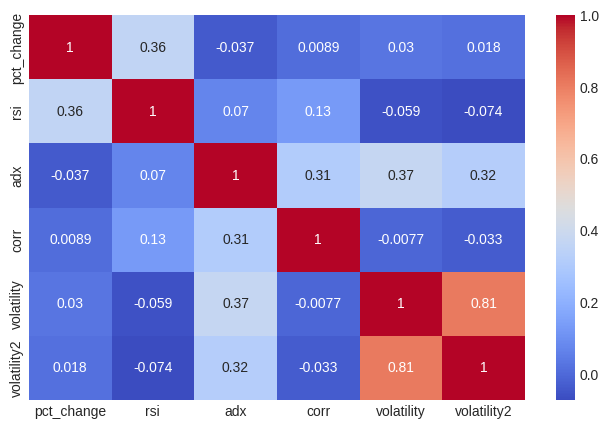

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In this exercise, we will define correlation to be high if it is greater than 0.7. The choice is subjective but it shouldn't be very small, otherwise most of the features will look correlated. And at the same time not very high, otherwise none of the feature will be correlated. In the above output, you can see that the correlation between `volatility` and `volatility2` is above the threshold of 0.7. Hence, we should drop any one of the above columns. We will drop the `volatility2` column. An automated code to get the correlated pair is below:

In [ ]:
def get_pair_above_threshold(X, threshold):
    """Function to return the pairs with correlation above
    threshold.
    """
    # Calculate the correlation matrix
    correl = X.corr()

    # Unstack the matrix
    correl = correl.abs().unstack()

    # Recurring & redundant pair
    pairs_to_drop = set()
    cols = X.corr().columns
    for i in range(0, X.corr().shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))

    # Drop the recurring & redundant pair
    correl = correl.drop(labels=pairs_to_drop) \
            .sort_values(ascending=False)

    return correl[correl > threshold].index


print(get_pair_above_threshold(X, 0.7))

MultiIndex([('volatility', 'volatility2')],
           )


In [ ]:
# Drop the highly correlated column
X = X.drop(columns=['volatility2'], axis=1)

In [ ]:
list(X.columns)

['pct_change', 'rsi', 'adx', 'corr', 'volatility']

## Train-Test Split

In [ ]:
# For data manipulation
import pandas as pd

# Import sklearn's train-test split module
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<ipython-input-21-c1750e94b383>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

# Print the dimensions of the variables
print(f"The shape of the X variable is {X.shape}.")
print(f"The shape of the y variable is {y.shape}. \n")
print(f"The shape of the X_train variable is {X_train.shape}.")
print(f"The shape of the y_train variable is {y_train.shape}.\n")
print(f"The shape of the X_test variable is {X_test.shape}.")
print(f"The shape of the y_test variable is {y_test.shape}.\n")

The shape of the X variable is (1613, 5).
The shape of the y variable is (1613, 1). 

The shape of the X_train variable is (1290, 5).
The shape of the y_train variable is (1290, 1).

The shape of the X_test variable is (323, 5).
The shape of the y_test variable is (323, 1).



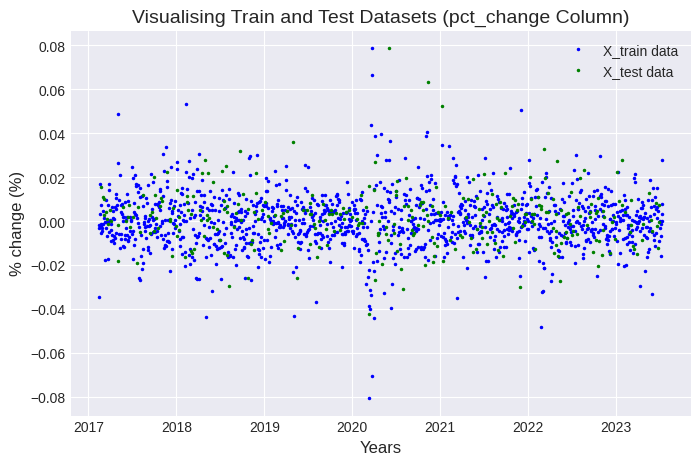

In [ ]:
# Plot the data
plt.figure(figsize=(8, 5))

plt.plot(X_train['pct_change'], linestyle='None',marker='.', markersize=3.0, label='X_train data', color='blue')
plt.plot(X_test['pct_change'], linestyle='None', marker='.', markersize=3.0, label='X_test data', color='green')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

We can see that the `train_data` (blue points) and the `test_data` (orange points) are randomly shuffled.

#### Do you want randomly shuffled data for our train and test datasets?

The answer depends on what type of data you are handling. If you are handling discrete observations, like the number of faulty products in a factory production line, then you can shuffle the indices for the train-test split.

But as seen in the above illustration, we are dealing with financial time-series data.

For time-series data, the order of indices matters and you cannot do random shuffling. This is because the indices in time series data are timestamps that occur one after the other (in sequence).

The data would make no sense if the timestamps are shuffled.


#### Correct Way of Splitting Time-series Data

To split the time-series data, we must not shuffle the datasets. We can specify the `shuffle` parameter to `False`. It is set to `True` by default, so not specifying it in the method call results in a shuffled output.

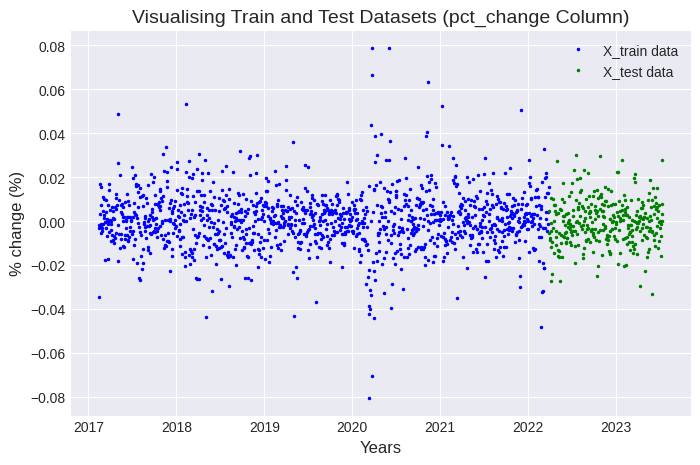

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=False)

# Plot the data
plt.figure(figsize=(8, 5))

plt.plot(X_train['pct_change'], linestyle='None',marker='.', markersize=3.0, label='X_train data', color='blue')
plt.plot(X_test['pct_change'], linestyle='None',marker='.', markersize=3.0, label='X_test data', color='green')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (pct_change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

## Train the Model

In [ ]:
# For data manipulation
import pandas as pd

# Import sklearn's Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create the machine learning model
rf_model = RandomForestClassifier(n_estimators=3, max_features=3, max_depth=2, random_state=4)

In [ ]:
# Fit the model on the training data
rf_model.fit(X_train, y_train['signal'])

RandomForestClassifier(max_depth=2, max_features=3, n_estimators=3,
                       random_state=4)

## Model Prediction

In [ ]:
# Get a sample day of the data from X_test
unseen_data_single_day = X_test.head(1)

# Preview the data
unseen_data_single_day

In [ ]:
# Get the prediction of a single day
single_day_prediction = rf_model.predict(unseen_data_single_day)

# Preview the prediction
single_day_prediction

array([1])

In [ ]:
# Use the model and predict the values for the test data
y_pred = rf_model.predict(X_test)

# Display the first five predictions
print("The first five predicted values", y_pred[:5])

The first five predicted values [1 1 1 1 1]


In [ ]:
y_test[:5]

,signal
Date,
2022-03-29,1
2022-03-30,0
2022-03-31,0
2022-04-01,0
2022-04-04,1


## Evalaute the Model

In [ ]:
# For data manipulation
import pandas as pd

# Libraries for evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import matplotlib.colors as clrs


<ipython-input-32-2c19ee8588f0>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### Confusion Matrix and Classificatoin Report

In [ ]:
def confusion_matrix(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))

In [ ]:
confusion_matrix(y_test,y_pred)

NameError: ignored

### Classification Report

# Topic 2 Supervised Learning Models and Applications

## Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.style.use('seaborn-darkgrid')

import yfinance as yf

import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm

<ipython-input-1-00db77f66a83>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
# end_date = 'datetime.date.today()'
# start_date = end_date - datetime.timedelta(days=365)

start_date = '2020-01-01'
#end_date = '2021-12-05'

ticker1 = 'D05.SI'
ticker2 = "U11.SI"

data1 = yf.download(ticker1,start=start_date)
data2 = yf.download(ticker2,start=start_date)
# plt.scatter(data1.Close,data2.Close,color='blue',figsize=(6,5))

data  = pd.merge(data1.Close, data2.Close, left_index=True, right_index=True)
data.rename(columns={'Close_x':f'{ticker1}', 'Close_y':f'{ticker2}'}, inplace=True)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,D05.SI,U11.SI
Date,,
2020-01-02,26.110001,26.680000
2020-01-03,26.000000,26.629999
2020-01-06,25.860001,26.370001
2020-01-07,26.049999,26.700001
2020-01-08,25.730000,26.719999
...,...,...
2023-07-04,31.420000,27.920000
2023-07-05,31.209999,27.830000
2023-07-06,30.709999,27.510000


Text(0, 0.5, 'U11.SI price')

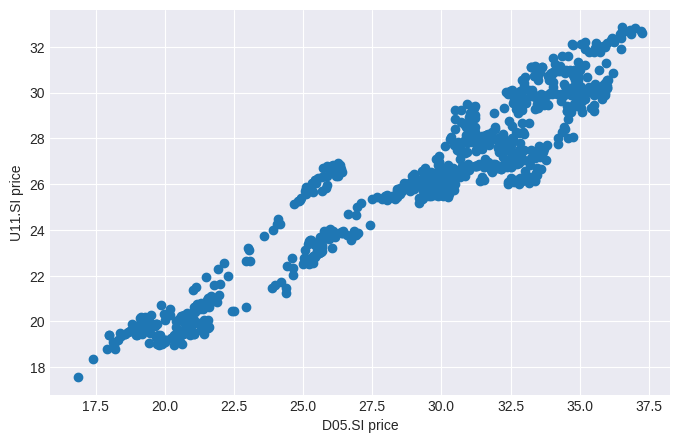

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data[f'{ticker1}'],data[f'{ticker2}'])
plt.xlabel(f'{ticker1} price' )
plt.ylabel(f'{ticker2} price' )

In [ ]:
Y = data[f'{ticker2}']
X = sm.add_constant(data[f'{ticker1}'])
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 U11.SI   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     8774.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:18:19   Log-Likelihood:                -1335.2
No. Observations:                 884   AIC:                             2674.
Df Residuals:                     882   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2700      0.213     29.411      0.000       5.852       6.688
D05.SI         0.6792      0.007     93.671      0.000       0.665       0.693
==============================================================================
Omnibus:                       22.489   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.821
Skew:                           0.402   Prob(JB):                     6.72e-06
Kurtosis:                       2.965   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

const     6.270013
D05.SI    0.679151
dtype: float64

Text(0, 0.5, 'U11.SI price')

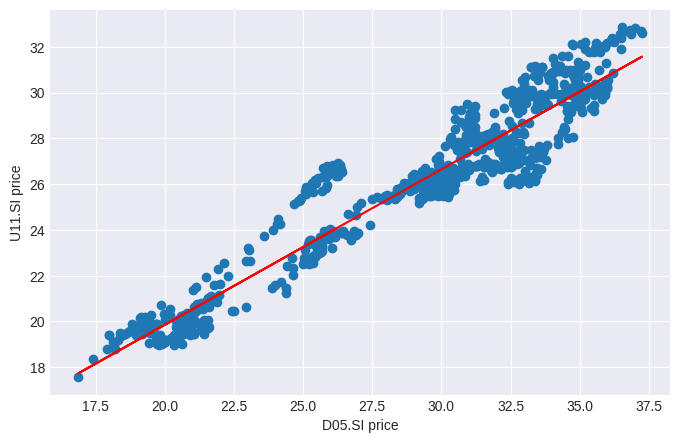

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data[f'{ticker1}'],data[f'{ticker2}'])
plt.plot(data[f'{ticker1}'],model.params[0]+model.params[1]*data[f'{ticker1}'],color='red')
plt.xlabel(f'{ticker1} price' )
plt.ylabel(f'{ticker2} price' )


## Logistic Regression

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

from sklearn import metrics
import seaborn as sns

# Plotting the graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pyfolio as pf

<ipython-input-7-8553f87cebc3>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,17.370001,17.400000,17.150000,17.320000,12.874813,3582956
2017-01-04,17.280001,17.670000,17.280001,17.520000,13.023481,3821700
2017-01-05,17.790001,17.950001,17.700001,17.799999,13.231618,4977400
2017-01-06,17.990000,17.990000,17.620001,17.670000,13.134982,3515200
2017-01-09,17.650000,17.879999,17.650000,17.850000,13.268787,1815100
...,...,...,...,...,...,...
2023-07-11,31.129999,31.160000,30.889999,31.010000,31.010000,2938700
2023-07-12,31.049999,31.299999,30.950001,31.010000,31.010000,3676100
2023-07-13,31.290001,31.950001,31.240000,31.870001,31.870001,6316200


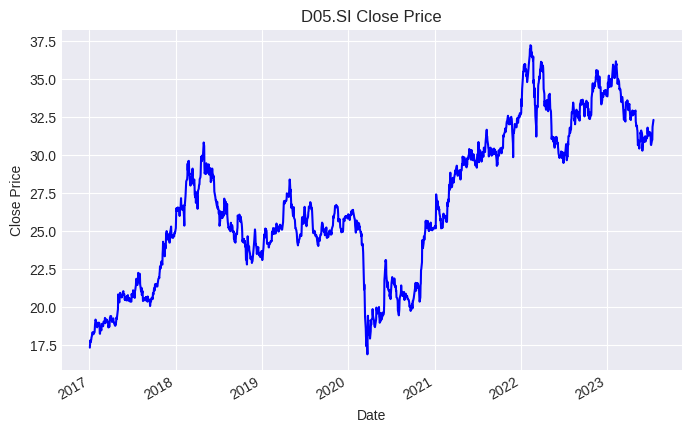

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    # --------------------------------
    # Create features
    # Create a column 'pct_change' w
    data['pct_change'] = data['Adj Close'].pct_change()

    # Create a column by the name RSI, and assign the RSI values to it
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # Create a column by the name ADX, and assign the ADX values to it
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # Create a column by the name sma, and assign the SMA values to it
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Create a column by the name corr, and assign the correlation values to it
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # 1-day and 2-day volatility
    data['volatility'] = data.rolling(14)['pct_change'].std()*100

    # -------------------------------------------------
    # Define target variable
    # Create a column 'future_returns' with the calculation of percentage change
    data['returns'] = data['Adj Close'].pct_change().shift(-1)

    # Create the signal column
    data['signal'] = np.where(data['returns'] > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['pct_change', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

NameError: ignored

#### Check the Coeficient

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

#### Calculate Class Probabilities

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

#### Predict Class Labels

In [ ]:
y_pred = model.predict(X_test)

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

In [ ]:
get_performance(strategy_data)

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

## Navie Bayes Model

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

import yfinance as yf

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import pyfolio as pf

In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    # --------------------------------
    # Create features
    # Create a column 'pct_change' w
    data['pct_change'] = data['Adj Close'].pct_change()

    # Create a column by the name RSI, and assign the RSI values to it
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # Create a column by the name ADX, and assign the ADX values to it
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # Create a column by the name sma, and assign the SMA values to it
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Create a column by the name corr, and assign the correlation values to it
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # 1-day and 2-day volatility
    data['volatility'] = data.rolling(14)['pct_change'].std()*100

    # -------------------------------------------------
    # Define target variable
    # Create a column 'future_returns' with the calculation of percentage change
    data['returns'] = data['Adj Close'].pct_change().shift(-1)

    # Create the signal column
    data['signal'] = np.where(data['returns'] > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['pct_change', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
model = BernoulliNB().fit(X_train, y_train)
# Fit the model on train dataset
model.fit(X_train, y_train)

#### Predict Class Labels

In [ ]:
y_pred = model.predict(X_test)

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

In [ ]:
get_performance(strategy_data)

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

## Decision Tree Model

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

import yfinance as yf

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import pyfolio as pf

In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    # --------------------------------
    # Create features
    # Create a column 'pct_change' w
    data['pct_change'] = data['Adj Close'].pct_change()

    # Create a column by the name RSI, and assign the RSI values to it
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # Create a column by the name ADX, and assign the ADX values to it
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # Create a column by the name sma, and assign the SMA values to it
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Create a column by the name corr, and assign the correlation values to it
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # 1-day and 2-day volatility
    data['volatility'] = data.rolling(14)['pct_change'].std()*100

    # -------------------------------------------------
    # Define target variable
    # Create a column 'future_returns' with the calculation of percentage change
    data['returns'] = data['Adj Close'].pct_change().shift(-1)

    # Create the signal column
    data['signal'] = np.where(data['returns'] > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['pct_change', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
model = model.fit(X_train, y_train)

#### Predict Class Labels

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
dot_data = tree.export_graphviz(model,  out_file=None, filled=True,feature_names=X.columns)
# To create the graph, you can uncomment
# the below line of code and run it
graphviz.Source(dot_data)

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

In [ ]:
get_performance(strategy_data)

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

## Random Forest Model

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

import yfinance as yf

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,17.370001,17.400000,17.150000,17.320000,13.530258,3582956
2017-01-04,17.280001,17.670000,17.280001,17.520000,13.686497,3821700
2017-01-05,17.790001,17.950001,17.700001,17.799999,13.905229,4977400
2017-01-06,17.990000,17.990000,17.620001,17.670000,13.803674,3515200
2017-01-09,17.650000,17.879999,17.650000,17.850000,13.944292,1815100
...,...,...,...,...,...,...
2022-06-13,29.969999,30.100000,29.900000,29.900000,29.900000,5986100
2022-06-14,29.750000,30.040001,29.520000,29.820000,29.820000,3727600
2022-06-15,29.660000,30.150000,29.660000,29.930000,29.930000,4538800


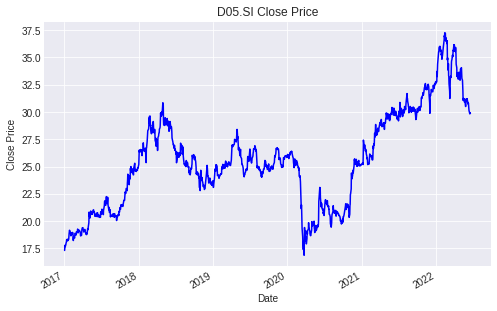

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    data['returns'] = data['Adj Close'].pct_change()

    # RSI
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # ADX
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # SMA
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Correlation
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # Volatility
    data['volatility'] = data.rolling(14)['returns'].std()*100

    # Create the signal column
    data['signal'] = np.where(data['returns'].shift(-1) > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['returns', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
clf = RandomForestClassifier(random_state=5, max_depth=3, max_features=3)
# Fit the model on train dataset
model = clf.fit(X_train, y_train)

#### Predict Class Labels

In [ ]:
y_pred = model.predict(X_test)

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


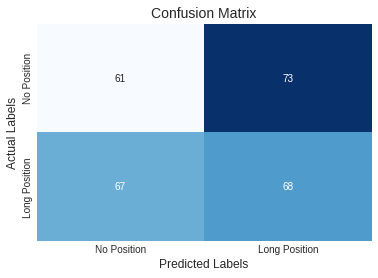

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       134
           1       0.48      0.50      0.49       135

    accuracy                           0.48       269
   macro avg       0.48      0.48      0.48       269
weighted avg       0.48      0.48      0.48       269



In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

,pct_change,predicted_signal,strategy_returns
Date,,,
2021-05-25,0.006718,1,0.006718
2021-05-27,0.003003,1,0.003003
2021-05-28,0.011643,1,0.011643
2021-05-31,-0.012496,1,-0.012496
2021-06-01,0.010656,1,0.010656


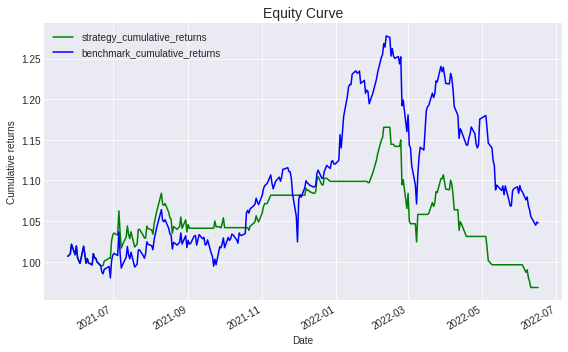

The maximum drawdown is -16.91%.


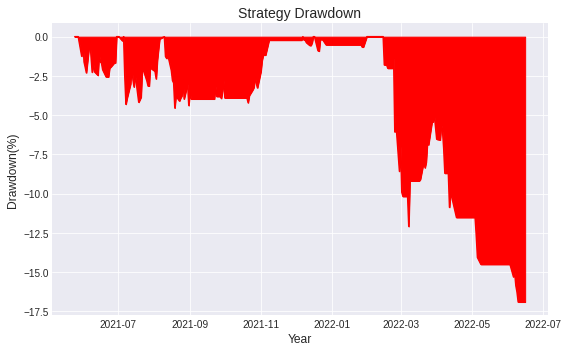

The Sharpe ratio is -0.16.


In [ ]:
get_performance(strategy_data)

Start date,2021-05-25
End date,2022-06-16
Total months,12
,Backtest
Annual return,-3.0%
Cumulative returns,-3.2%
Annual volatility,13.4%
Sharpe ratio,-0.16
Calmar ratio,-0.18
Stability,0.02
Max drawdown,-16.9%


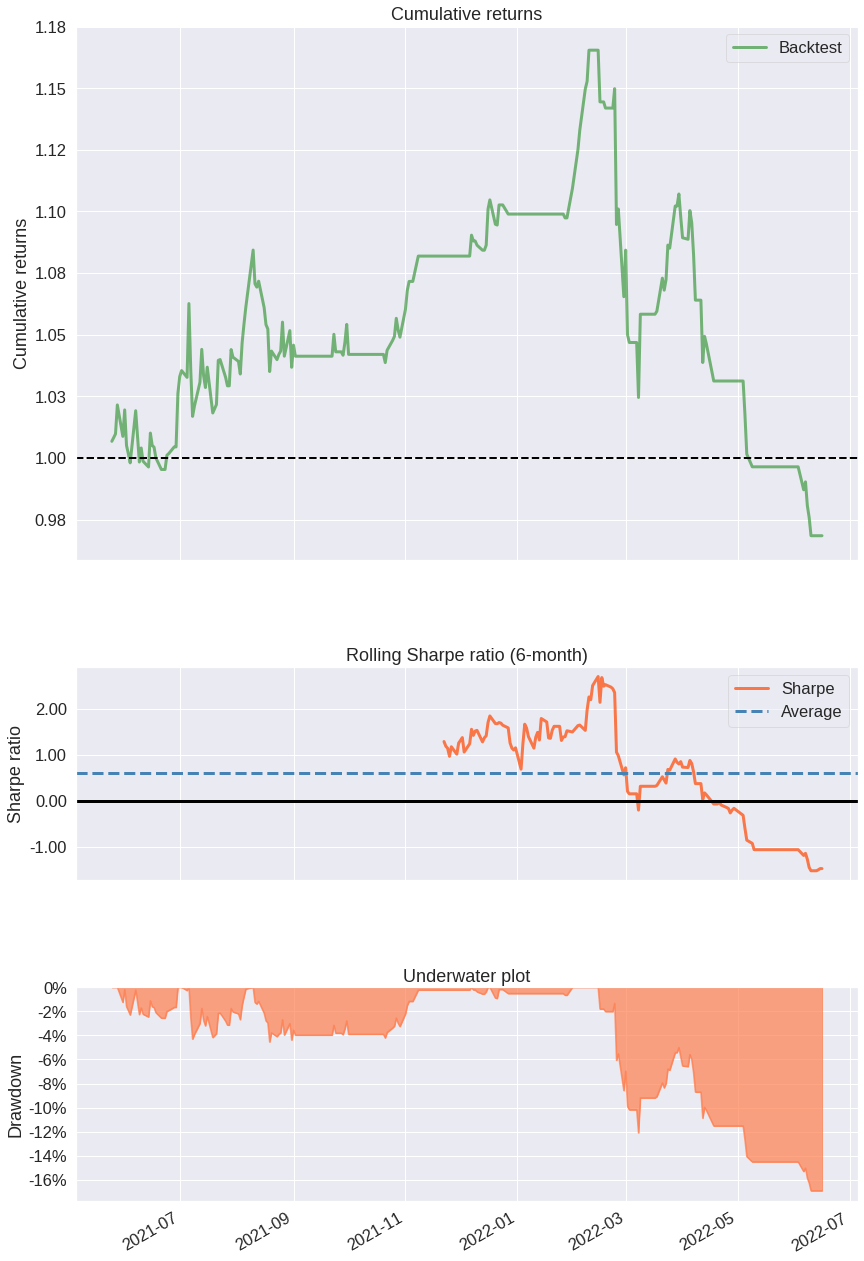

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

## Random Forest Model (2nd Version)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import date

import yfinance as yf
import pyfolio as pf

import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

In [ ]:
# end_date = '2022-01-01'
# start_date = '2021-01-01'

# end_date = date.today()
# start_date = end_date - datetime.timedelta(days=365)

ticker = 'MSFT'
data = yf.download(ticker)
data

In [ ]:
data['Adj Close'].plot()

In [ ]:
# Features construction
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [ ]:
data

In [ ]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.7)
split

In [ ]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
clf = RandomForestClassifier(random_state=5)

In [ ]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize=True)*100.0)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

In [ ]:
data

In [ ]:
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

In [ ]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

In [ ]:
pf.create_simple_tear_sheet(data.strategy_returns)

## XGBoost Model

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

import yfinance as yf

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
import xgboost
from xgboost import XGBClassifier

from sklearn import metrics
import pyfolio as pf

In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    # --------------------------------
    # Create features
    # Create a column 'pct_change' w
    data['pct_change'] = data['Adj Close'].pct_change()

    # Create a column by the name RSI, and assign the RSI values to it
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # Create a column by the name ADX, and assign the ADX values to it
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # Create a column by the name sma, and assign the SMA values to it
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Create a column by the name corr, and assign the correlation values to it
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # 1-day and 2-day volatility
    data['volatility'] = data.rolling(14)['pct_change'].std()*100

    # -------------------------------------------------
    # Define target variable
    # Create a column 'future_returns' with the calculation of percentage change
    data['returns'] = data['Adj Close'].pct_change().shift(-1)

    # Create the signal column
    data['signal'] = np.where(data['returns'] > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['pct_change', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
model = XGBClassifier(max_depth=2, n_estimators=30)
# Fit the model on train dataset
model.fit(X_train, y_train)

#### Predict Class Labels

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
xgboost.plot_importance(model, max_num_features=7)

# Show the plot
plt.show()

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

In [ ]:
get_performance(strategy_data)

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

## Neural Network Model

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

import yfinance as yf

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn import metrics
import pyfolio as pf

In [ ]:
ticker = 'D05.SI'
data = yf.download(ticker,start='2017-01-01')
data

In [ ]:
data.Close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f'{ticker} Close Price' )
plt.show()

#### Create Features and Target

In [ ]:
def get_target_features(data):
    # --------------------------------
    # Create features
    # Create a column 'pct_change' w
    data['pct_change'] = data['Adj Close'].pct_change()

    # Create a column by the name RSI, and assign the RSI values to it
    data['rsi'] = ta.RSI(data['Adj Close'].values, timeperiod=14)

    # Create a column by the name ADX, and assign the ADX values to it
    data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=14)

    # Create a column by the name sma, and assign the SMA values to it
    data['sma'] = data['Adj Close'].rolling(window=14).mean()

    # Create a column by the name corr, and assign the correlation values to it
    data['corr'] = data['Adj Close'].rolling(window=14).corr(data['sma'])

    # 1-day and 2-day volatility
    data['volatility'] = data.rolling(14)['pct_change'].std()*100

    # -------------------------------------------------
    # Define target variable
    # Create a column 'future_returns' with the calculation of percentage change
    data['returns'] = data['Adj Close'].pct_change().shift(-1)

    # Create the signal column
    data['signal'] = np.where(data['returns'] > 0, 1, 0)

    data = data.dropna()

    return data['signal'], data[['pct_change', 'rsi', 'adx', 'corr', 'volatility']]


In [ ]:
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#### Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Define and Train the Model

In [ ]:
# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(
        units = 128,
        kernel_initializer = 'uniform',
        activation = 'relu',
        input_dim = X.shape[1]
        ))

classifier.add(Dense(
        units = 128,
        kernel_initializer = 'uniform',
        activation = 'relu'
        ))

classifier.add(Dense(
        units = 1,
        kernel_initializer = 'uniform',
        activation = 'sigmoid'
        ))

In [ ]:
classifier.compile(
                   optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']
                   )

In [ ]:
classifier.fit(X_train, y_train, batch_size = 20, epochs = 100)

#### Predict Class Labels

In [ ]:
predicted = classifier.predict(X_test)
predicted = np.where(predicted>0.5,1,0)

#### Evaluate the Model

In [ ]:
def get_metrics(y_test, predicted):
    confusion_matrix_data = metrics.confusion_matrix(y_test, predicted)
    # Plot the data

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

    # Set the axes labels and the title
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('Actual Labels', fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
    ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

    # Display the plot
    plt.show()

    print(metrics.classification_report(y_test, predicted))


In [ ]:
get_metrics(y_test, y_pred)

#### Create Trading Strategy Using the Model

In [ ]:
def plot_equity_curve(strategy_data):

    # Calculate the cumulative returns
    strategy_data['strategy_cumulative_returns'] = (1+strategy_data['strategy_returns']).cumprod()

    strategy_data['benchmark_cumulative_returns'] = (1+strategy_data['pct_change']).cumprod()

    # ---------------------Equity Curve---------------------
    # Plot cumulative strategy returns
    strategy_data['strategy_cumulative_returns'].plot(figsize=(8, 5), color='green')
    strategy_data['benchmark_cumulative_returns'].plot(figsize=(8, 5), color='blue')
    plt.title('Equity Curve', fontsize=14)
    plt.legend()
    plt.ylabel('Cumulative returns')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_drawdown(strategy_data):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(strategy_data['strategy_cumulative_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((strategy_data['strategy_cumulative_returns'])/running_max - 1) * 100

    # Calculate the maximum drawdown
    max_dd = drawdown.min()
    print("The maximum drawdown is {0:.2f}%.".format(max_dd))

    # ---------------------DD plot---------------------
    fig = plt.figure(figsize=(8, 5))

    # Plot max drawdown
    plt.plot(drawdown, color='red')
    # Fill in-between the drawdown
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.title('Strategy Drawdown', fontsize=14)
    plt.ylabel('Drawdown(%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def sharpe_ratio(strategy_data):
    sharpe_ratio = round(strategy_data['strategy_returns'].mean() / strategy_data['strategy_returns'].std() * np.sqrt(252), 2)
    print("The Sharpe ratio is {0:.2f}.".format(sharpe_ratio))


In [ ]:
def get_performance(strategy_data):
    plot_equity_curve(strategy_data)
    plot_drawdown(strategy_data)
    sharpe_ratio(strategy_data)

In [ ]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1) * strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

In [ ]:
get_performance(strategy_data)

In [ ]:
pf.create_simple_tear_sheet(strategy_data['strategy_returns'])

# Topic 3 Unsupervised Learning Models and Applications

## K-Means Clustering

In [ ]:
!pip install yfinance
!pip install yahoo_fin
!pip install talib_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 11.8 MB/s 


In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta
import yahoo_fin.stock_info as si

# Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
# Scaling the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sc

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/Straits_Times_Index', match='List of STI constituents')
tickerlist = [df[0]['Stock Symbol'][i].split()[1]+'.SI' for i in range(30)]
stocklist = [df[0]['Company'][i] for i in range(30)]
stocklist

['Ascendas Real Estate Investment Trust',
 'CapitaLand Integrated Commercial Trust',
 'CapitaLand Investment',
 'City Developments Limited',
 'ComfortDelGro Corporation',
 'Dairy Farm International Holdings',
 'DBS Group Holdings',
 'Frasers Logistics & Commercial Trust',
 'Genting Singapore PLC',
 'Hongkong Land Holdings',
 'Jardine Cycle & Carriage',
 'Jardine Matheson Holdings Limited',
 'Keppel Corporation',
 'Keppel DC Reit',
 'Mapletree Commercial Trust',
 'Mapletree Industrial Trust',
 'Mapletree Logistics Trust',
 'Oversea-Chinese Banking Corp',
 'SATS',
 'Sembcorp Industries',
 'Singapore Airlines',
 'Singtel',
 'Singapore Exchange',
 'Singapore Technologies Engineering',
 'Thai Beverages',
 'United Overseas Bank',
 'UOL Group',
 'Venture Corporation',
 'Wilmar International',
 'Yangzijiang Shipbuilding Holdings\xa0[zh]']

In [ ]:
data = []
for i, ticker in enumerate(tickerlist):
    d = si.get_quote_table(f"{ticker}")
    s = stocklist[i]
    data.append([s,d['Beta (5Y Monthly)'],d['EPS (TTM)'],d['PE Ratio (TTM)']])

In [ ]:
df = pd.DataFrame(data, columns=['stock','beta','eps','pe_ratio'])
df.set_index('stock',inplace=True)
df.dropna(inplace=True)
df

,beta,eps,pe_ratio
stock,,,
Ascendas Real Estate Investment Trust,0.48,0.133,21.43
CapitaLand Integrated Commercial Trust,0.76,0.151,14.83
ComfortDelGro Corporation,1.08,0.074,19.46
Dairy Farm International Holdings,0.23,0.127,22.91
DBS Group Holdings,1.15,2.460,12.36
Frasers Logistics & Commercial Trust,0.91,0.213,6.29
Genting Singapore PLC,1.22,0.023,33.70
Jardine Cycle & Carriage,0.79,1.600,19.94
Jardine Matheson Holdings Limited,0.39,0.760,77.59


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[-1.01009372 -0.39619648 -0.35232723  0.66953406]
 [-0.17689459 -0.44541679 -0.32895917 -0.66953406]
 [ 1.38951979 -0.50557495  1.40852471 -0.66953406]
 [ 0.95625624 -0.52901319 -0.08634374 -0.66953406]
 [-1.74330896 -0.5165128   0.24103817  0.66953406]
 [ 1.22287996  1.40073559 -0.36080388 -0.66953406]
 [ 0.35635286 -0.3829148  -0.51177987 -0.66953406]
 [ 1.25620792 -0.56417056  0.54757212 -0.66953406]
 [-0.34353441  1.22104238 -0.31933703 -0.66953406]
 [-1.24338948  4.11957192 -0.41166377  2.00860219]
 [ 0.38968083 -0.13837579 -0.35255633 -0.66953406]
 [-1.80996489 -0.42822874 -0.38760842  0.66953406]
 [ 0.08972914 -0.4946371  -0.23296685 -0.66953406]
 [-1.24338948 -0.44697934 -0.28497224  0.66953406]
 [-0.47684627 -0.44151041 -0.40983098  0.66953406]
 [ 0.25636896  0.23663612 -0.37661168 -0.66953406]
 [ 1.15622403 -0.56182673  4.60765773  3.34767032]
 [ 0.48966472 -0.45947973 -0.20249674 -0.66953406]
 [-1.67665303 -0.27119251 -0.0606847   0.66953406]
 [-0.6434861  -0.43369767 -0.11

### Determine the Optimum K

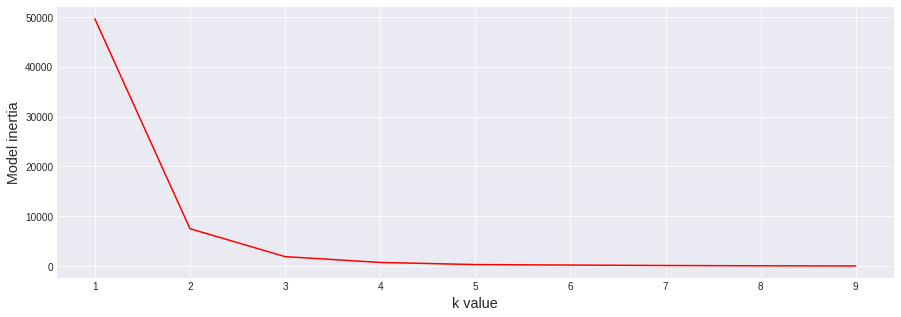

In [ ]:
# Calculating inertia for k-means models with different values
# of 'k'
inertia = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

# Plotting the 'elbow curve'
plt.figure(figsize=(15,5))
plt.xlabel('k value',fontsize='x-large')
plt.ylabel('Model inertia',fontsize='x-large')
plt.plot(k_range,inertia,color='r')
plt.show()

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=5).fit(df_values)

### Assign the Clusters

In [ ]:
clusters = km_model.labels_
df['cluster']=clusters
df

,beta,eps,pe_ratio,clusters,cluster
stock,,,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.39,4,1
CapitaLand Integrated Commercial Trust,0.72,0.167,13.41,0,0
City Developments Limited,1.19,0.090,89.25,0,0
ComfortDelGro Corporation,1.06,0.060,24.00,0,0
Dairy Farm International Holdings,0.25,0.076,38.29,4,1
DBS Group Holdings,1.14,2.530,12.02,1,4
Frasers Logistics & Commercial Trust,0.88,0.247,5.43,0,0
Genting Singapore PLC,1.15,0.015,51.67,0,0
Jardine Cycle & Carriage,0.67,2.300,13.83,1,4


### Visualize the Clusters

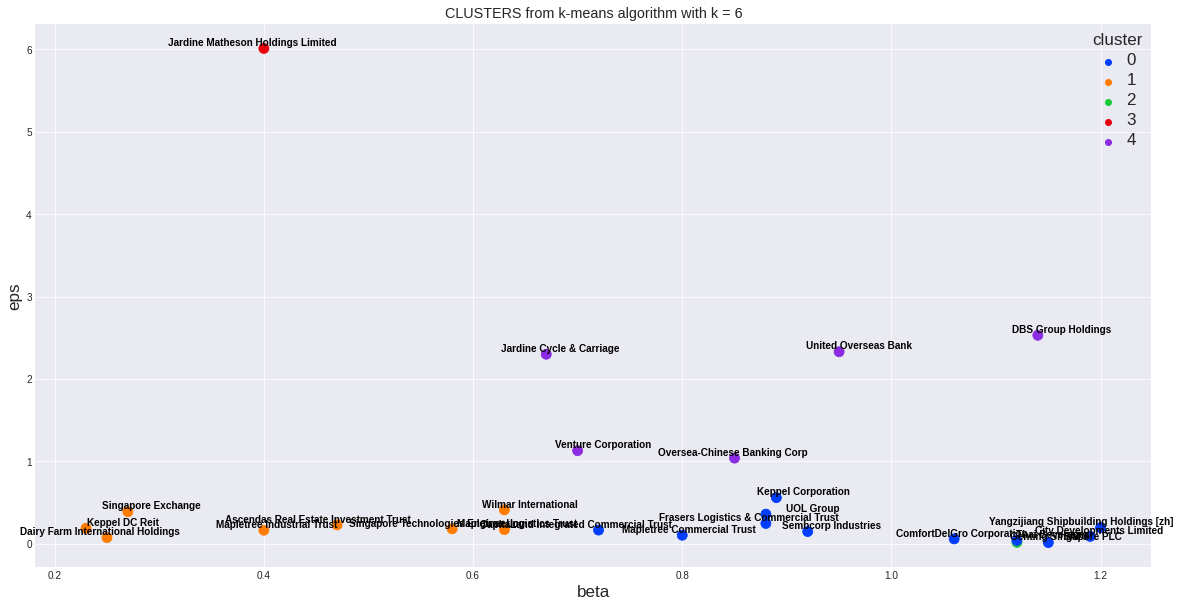

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set graph size
plt.figure(figsize=(20, 10))

# Set x and y axis labels
ax = sns.scatterplot(y="eps", x="beta", edgecolor='face',hue="cluster", data=df, palette='bright', s=100)

# Plot the graph
plt.xlabel('beta', size=17)
plt.ylabel('eps', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='17')
plt.title('CLUSTERS from k-means algorithm with k = 6', fontsize='x-large')

# Label individual elements
for i in range(0, df.shape[0]):
    plt.text(df.beta[i]+0.07, df['eps'][i]+0.01, df.index[i],
             horizontalalignment='right',
             verticalalignment='bottom', size='medium',
             color='black', weight='semibold')

## Hierarchical Clustering

In [ ]:
!pip install yfinance
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.3 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 44.3 MB/s 
     |████████████████████████████████| 138 kB 37.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=b656374638f9704bb5d47629976c35b8d03af91f57f66a6f14f0c3c6ac7caa5a
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8b0cf0d0d18c59367f668d99259991764f23f3664879e680505e72c353ec6a58
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgml

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
# Scaling the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

import yahoo_fin.stock_info as si

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/Straits_Times_Index', match='List of STI constituents')
tickerlist = [df[0]['Stock Symbol'][i].split()[1]+'.SI' for i in range(30)]
stocklist = [df[0]['Company'][i] for i in range(30)]
stocklist

['Ascendas Real Estate Investment Trust',
 'CapitaLand Integrated Commercial Trust',
 'CapitaLand Investment',
 'City Developments Limited',
 'ComfortDelGro Corporation',
 'Dairy Farm International Holdings',
 'DBS Group Holdings',
 'Frasers Logistics & Commercial Trust',
 'Genting Singapore PLC',
 'Hongkong Land Holdings',
 'Jardine Cycle & Carriage',
 'Jardine Matheson Holdings Limited',
 'Keppel Corporation',
 'Keppel DC Reit',
 'Mapletree Commercial Trust',
 'Mapletree Industrial Trust',
 'Mapletree Logistics Trust',
 'Oversea-Chinese Banking Corp',
 'SATS',
 'Sembcorp Industries',
 'Singapore Airlines',
 'Singtel',
 'Singapore Exchange',
 'Singapore Technologies Engineering',
 'Thai Beverages',
 'United Overseas Bank',
 'UOL Group',
 'Venture Corporation',
 'Wilmar International',
 'Yangzijiang Shipbuilding Holdings\xa0[zh]']

In [ ]:
data = []
for i, ticker in enumerate(tickerlist):
    d = si.get_quote_table(f"{ticker}")
    s = stocklist[i]
    data.append([s,d['Beta (5Y Monthly)'],d['EPS (TTM)'],d['PE Ratio (TTM)']])

In [ ]:
df = pd.DataFrame(data, columns=['stock','beta','eps','pe_ratio'])
df.set_index('stock',inplace=True)
df.dropna(inplace=True)
df

,beta,eps,pe_ratio
stock,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.39
CapitaLand Integrated Commercial Trust,0.72,0.167,13.41
City Developments Limited,1.19,0.090,89.25
ComfortDelGro Corporation,1.06,0.060,24.00
Dairy Farm International Holdings,0.25,0.076,38.29
DBS Group Holdings,1.14,2.530,12.02
Frasers Logistics & Commercial Trust,0.88,0.247,5.43
Genting Singapore PLC,1.15,0.015,51.67
Jardine Cycle & Carriage,0.67,2.300,13.83


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[-1.01009372 -0.39619648 -0.35232723  0.66953406  1.21645747]
 [-0.17689459 -0.44541679 -0.32895917 -0.66953406 -0.76028592]
 [ 1.38951979 -0.50557495  1.40852471 -0.66953406 -0.76028592]
 [ 0.95625624 -0.52901319 -0.08634374 -0.66953406 -0.76028592]
 [-1.74330896 -0.5165128   0.24103817  0.66953406  1.21645747]
 [ 1.22287996  1.40073559 -0.36080388 -0.66953406 -0.76028592]
 [ 0.35635286 -0.3829148  -0.51177987 -0.66953406 -0.76028592]
 [ 1.25620792 -0.56417056  0.54757212 -0.66953406 -0.76028592]
 [-0.34353441  1.22104238 -0.31933703 -0.66953406 -0.76028592]
 [-1.24338948  4.11957192 -0.41166377  2.00860219  2.20482917]
 [ 0.38968083 -0.13837579 -0.35255633 -0.66953406 -0.76028592]
 [-1.80996489 -0.42822874 -0.38760842  0.66953406  1.21645747]
 [ 0.08972914 -0.4946371  -0.23296685 -0.66953406 -0.76028592]
 [-1.24338948 -0.44697934 -0.28497224  0.66953406  1.21645747]
 [-0.47684627 -0.44151041 -0.40983098  0.66953406  1.21645747]
 [ 0.25636896  0.23663612 -0.37661168 -0.66953406 -0.76

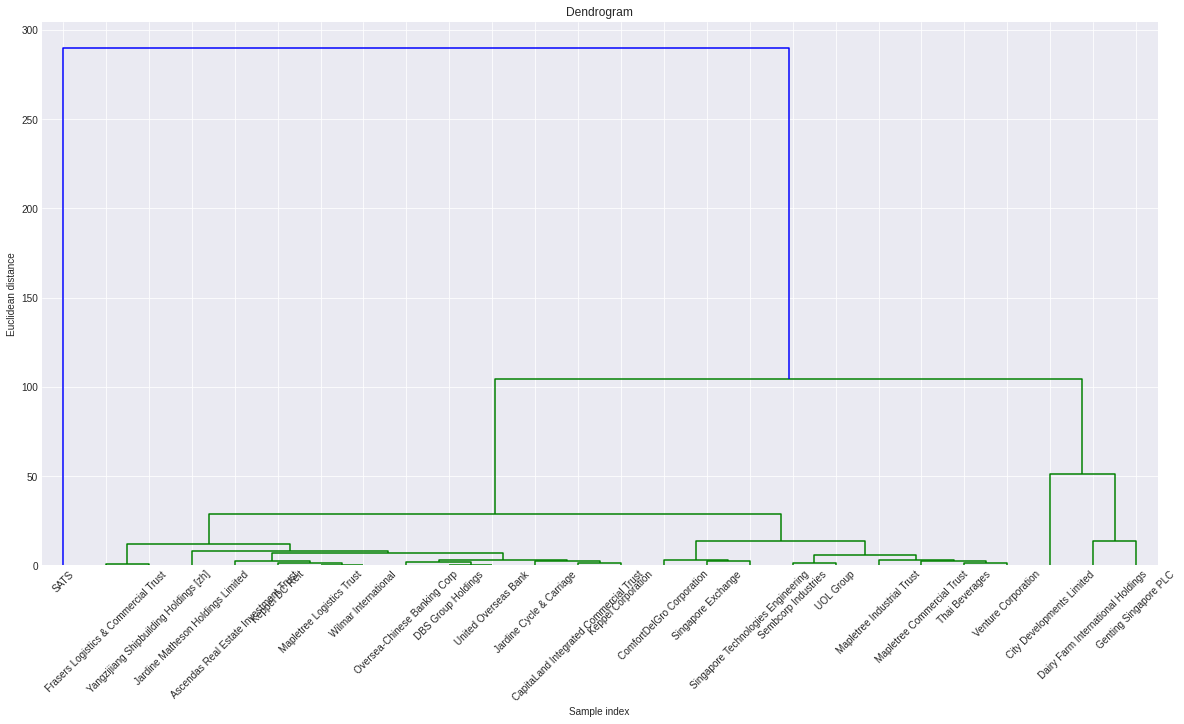

In [ ]:
# Plot a dendrogram
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")

# Create a dendrogram
sc.dendrogram(sc.linkage(df, method='ward'),labels=df.index)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Instantiate the clustering algorithm
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Using the fit function
cluster.fit(df_values)
df['clusters']=cluster.labels_
df

,beta,eps,pe_ratio,clusters,cluster
stock,,,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.39,4,2
CapitaLand Integrated Commercial Trust,0.72,0.167,13.41,0,0
City Developments Limited,1.19,0.090,89.25,0,0
ComfortDelGro Corporation,1.06,0.060,24.00,0,0
Dairy Farm International Holdings,0.25,0.076,38.29,4,2
DBS Group Holdings,1.14,2.530,12.02,1,0
Frasers Logistics & Commercial Trust,0.88,0.247,5.43,0,0
Genting Singapore PLC,1.15,0.015,51.67,0,0
Jardine Cycle & Carriage,0.67,2.300,13.83,1,0


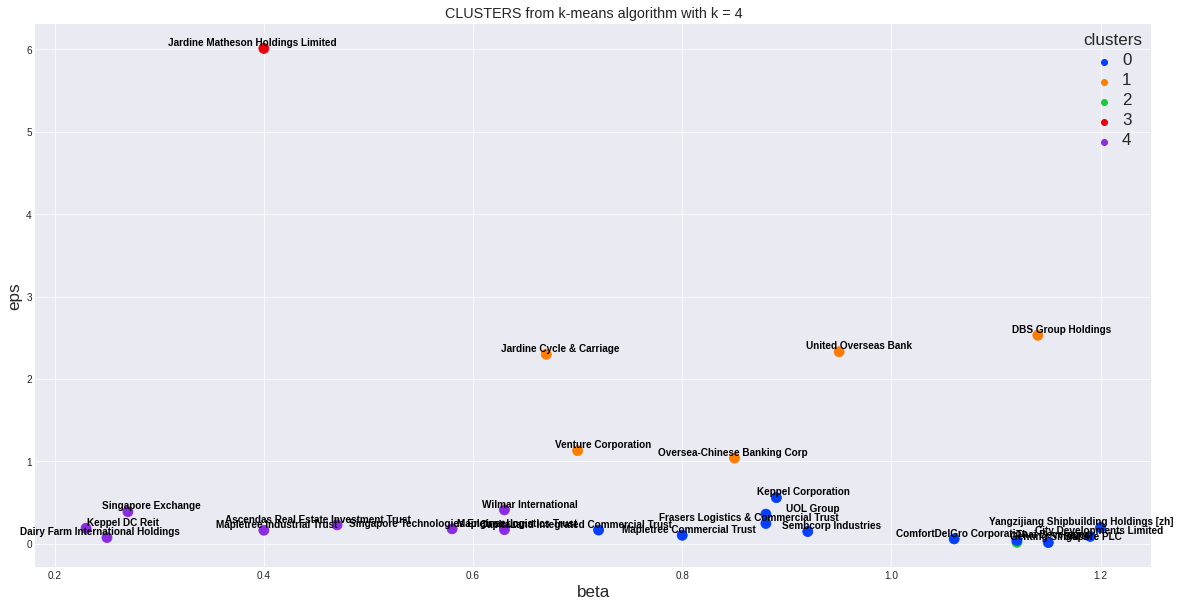

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set graph size
plt.figure(figsize=(20, 10))

# Set x and y axis labels
ax = sns.scatterplot(y="eps", x="beta", edgecolor='face',hue="clusters", data=df, palette='bright', s=100)

# Plot the graph
plt.xlabel('beta', size=17)
plt.ylabel('eps', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='17')
plt.title('CLUSTERS from k-means algorithm with k = 4', fontsize='x-large')

# Label individual elements
for i in range(0, df.shape[0]):
    plt.text(df.beta[i]+0.07, df['eps'][i]+0.01, df.index[i],
             horizontalalignment='right',
             verticalalignment='bottom', size='medium',
             color='black', weight='semibold')

## Principal Component Analysis (PCA)

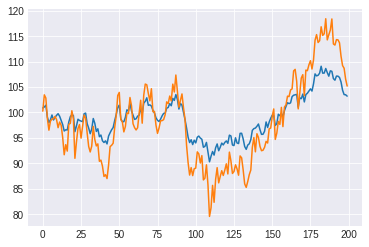

In [ ]:
np.random.seed(20)
x = np.cumsum(np.random.randn(200)) + 100
y = x*2 + np.random.randn(200) - 100
plt.plot(x)
plt.plot(y)

In [ ]:
x_ = x-np.mean(x)
y_ = y-np.mean(y)

In [ ]:
R = np.array([x_,y_])
S = np.cov(R)
S

array([[17.01547369, 33.69556579],
       [33.69556579, 67.62804956]])

In [ ]:
EIG = np.linalg.eig(S)
print(EIG[0])

[ 0.18152713 84.46199612]


In [ ]:
EV = EIG[1]
print(EV)

[[-0.89457408 -0.4469197 ]
 [ 0.4469197  -0.89457408]]


In [ ]:
dx1 = EV[0,0]
dy1 = EV[1,0]
slope1 = dy1 / dx1

In [ ]:
dx2 = EV[0,1]
dy2 = EV[1,1]
slope2 = dy2 / dx2

In [ ]:
xx = np.linspace(min(R[0,:]),max(R[0,:]),200)
yy1 = slope1 * xx
yy2 = slope2 * xx

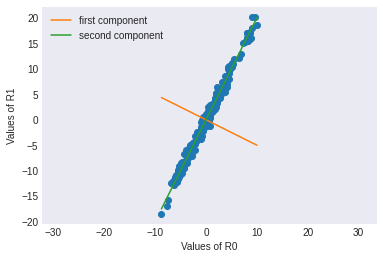

In [ ]:
# Plot de-meaned x - y correlation
plt.plot(R[0,:],R[1,:],'o')

# Plot the first principal component
plt.plot(xx,yy1,label='first component')

# Plot the second principal component
plt.plot(xx,yy2,label='second component')

plt.legend()

plt.xlabel('Values of R0')

plt.ylabel('Values of R1')

plt.grid()

plt.axis('equal');

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
data = yf.download("D05.SI U11.SI O39.SI", start="2010-06-01")

In [ ]:
data

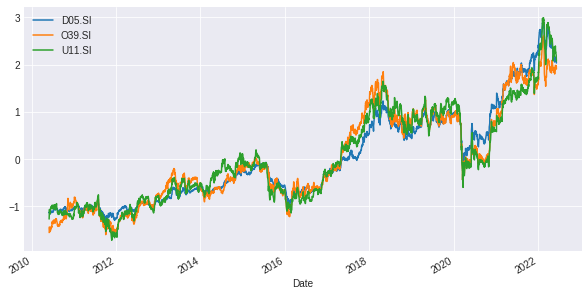

In [ ]:
normalized = (data['Adj Close']-data['Adj Close'].mean())/data['Adj Close'].std()
normalized.plot(figsize=(10,5))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(data['Adj Close'].values.T)

In [ ]:
index=abs(pca.components_[0].T)
index

array([0.01072334, 0.01093925, 0.01118573, ..., 0.03113966, 0.03071141,
       0.03046354])

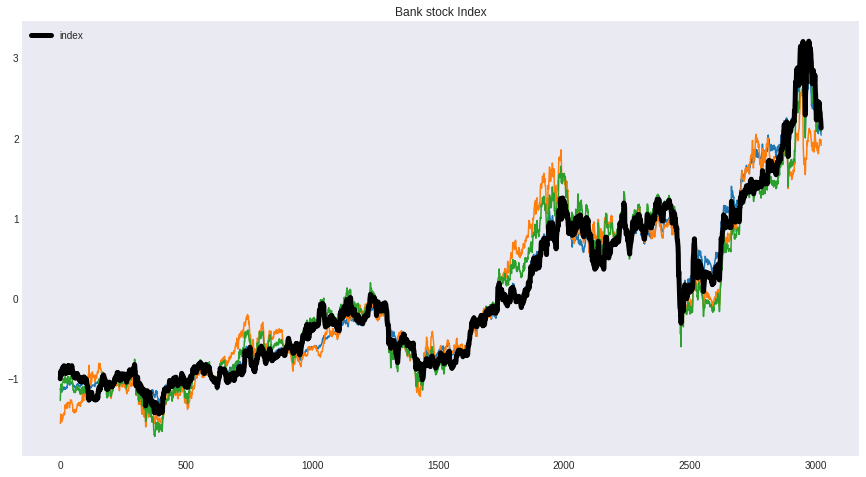

In [ ]:
plt.figure(figsize=[15,8])
plt.plot(normalized.values)
plt.plot((index-np.mean(index))/np.std(index),'k',lw=5,label='index')
plt.legend()
plt.title('Bank stock Index')
plt.grid();


## LSTM Strategy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import date

import yfinance as yf

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)

In [ ]:
ticker = 'MSFT'
data = yf.download(ticker)
data

In [ ]:
data['Adj Close'].plot()

In [ ]:
data['return'] = data['Adj Close'].pct_change()
data['target'] = np.where(data['return'].shift(-1) > 0, 1, 0)
data.dropna(inplace=True)
data

In [ ]:
data['target'].value_counts()

In [ ]:
def sliding_window(data, timesteps):
    x = []
    y = []

    for i in range(len(data)-timesteps):
        _x = data.iloc[i:(i+timesteps)][['Open','High','Low','Adj Close']]
        _y = data.iloc[i+timesteps-1]['target']
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
timesteps = 3
X,y = sliding_window(data, timesteps)

In [ ]:
X.shape,y.shape

#### Split data for Train and Test

In [ ]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.7)
split

In [ ]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#### Scale the Data

In [ ]:
# To avoid look ahead bias, scale the X_train and X_test separately

X_train_min = X_train.min()
X_train_max = X_train.max()
X_test_min = X_test.min()
X_test_max = X_test.max()

X_train2 = (X_train-X_train_min)/(X_train_max-X_train_min)
X_test2 = (X_test-X_test_min)/(X_test_max-X_test_min)

In [ ]:
# To avoid look ahead bias, scale the X_train and X_test separately

X_train_min = X_train.min()
X_train_max = X_train.max()


X_train2 = (X_train-X_train_min)/(X_train_max-X_train_min)
X_test2 = (X_test-X_train_min)/(X_train_max-X_train_min)

### Model

#### Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

feature = X_train.shape[2]
hidden_size = 5

model = Sequential()
model.add(LSTM(hidden_size,input_shape=(timesteps,feature)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Stacked LSTM Moddel

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM,Dense

# feature = X_train.shape[2]
# hidden_size = 5

# model = Sequential()
# model.add(LSTM(hidden_size,return_sequences=True,input_shape=(timesteps,feature)))
# model.add(LSTM(hidden_size,return_sequences=True))
# model.add(LSTM(hidden_size))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Bidirectional LSTM model

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM,Dense,Bidirectional

# feature = X_train.shape[2]
# hidden_size = 5

# model = Sequential()
# model.add(Bidirectional(LSTM(hidden_size,input_shape=(timesteps,feature))))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Bidirectional Stacked LSTM model

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM,Dense,Bidirectional

# feature = X_train.shape[2]
# hidden_size = 5

# model = Sequential()
# model.add(Bidirectional(LSTM(hidden_size,return_sequences=True,input_shape=(timesteps,feature))))
# model.add(Bidirectional(LSTM(hidden_size)))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100,batch_size=32)
#history = model.fit(X_train2, y_train, epochs=100,batch_size=32)

#### Evaluate the Model

In [ ]:
loss = history.history['loss']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss)
plt.xlabel('Epoch')
plt.ylabel('Loss]')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test2,y_test)
print(f"Accuracy of the model = {np.round(acc*100,2)}%")

In [ ]:
y_pred = np.where(model.predict(X_test2)>0.5,1,0)

In [ ]:
sum(y_test==0), sum(y_pred==0)

In [ ]:
sum(y_test==1), sum(y_pred==1)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [ ]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
data.drop(data.index[:timesteps], axis=0, inplace=True)
data['pred'] = np.where(model.predict(X)>0.5,1,-1)
data

In [ ]:
data['strategy_return'] = data['return'].shift(-1) * data['pred']
data

In [ ]:
import matplotlib.pyplot as plt
data.strategy_return[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

In [ ]:
(data.strategy_return[split:]+1).cumprod().plot()
plt.ylabel('Strategy return (%)')
plt.show()

In [ ]:
pf.create_simple_tear_sheet(data.strategy_return)

### Activity: Import Stock Data from Yahoo Finance

In [ ]:
# end_date = '2022-01-01'
# start_date = '2021-01-01'

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*1)

ticker = 'Z74.SI'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
stock[['Open', 'High', 'Low', 'Close','Adj Close']].plot(grid=True, linewidth=1, figsize=(14, 9))

In [ ]:
import yfinance as yf

stock = yf.Ticker("D05.SI")

# get stock info
print(stock.info)

# get historical market data
hist = stock.history(period="max")

# show actions (dividends, splits)
print(stock.actions)

# show dividends
print(stock.dividends)

# show splits
print(stock.splits)

# show financials
print(stock.financials)
print(stock.quarterly_financials)

# show major holders
print(stock.major_holders)

# show institutional holders
print(stock.institutional_holders)

# show balance sheet
print(stock.balance_sheet)
print(stock.quarterly_balance_sheet)

# show cashflow
print(stock.cashflow)
print(stock.quarterly_cashflow)

# show earnings
print(stock.earnings)
print(stock.quarterly_earnings)

# show sustainability
print(stock.sustainability)

# show analysts recommendations
print(stock.recommendations)

# show next event (earnings, etc)
print(stock.calendar)

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
print(stock.isin)

# show options expirations
print(stock.options)

# show news
print(stock.news)


### Simple Return and Log Return

In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365)

ticker = 'D05.SI'
stock =z
 yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
stock['simple_return'] = stock['Adj Close']/stock['Adj Close'].shift(1) - 1
stock['log_return'] = np.log(stock['Adj Close']/stock['Adj Close'].shift(1))
# stock['simple_return'] = stock['Adj Close'].pct_change()
# stock['log_return'] = np.log(stock['Adj Close']).diff()
stock

In [ ]:
stock['simple_return'].hist(figsize=(14,5),bins=20)

In [ ]:
stock['log_return'].hist(figsize=(14,5),bins=20)

### Strategy Backtesting Steps

In [ ]:
stock1 = stock.copy()
stock1['Close'].plot(grid=True, figsize=(9, 5))

In [ ]:
#signal
stock1['signal'] = np.where(stock1['Close'] < 30, 1, 0)
stock1['signal'] = np.where(stock1['Close'] > 35, -1, stock1['signal'])

stock1

In [ ]:
#indicator
from ta.momentum import RSIIndicator
stock2=stock.copy()
stock2['rsi'] = RSIIndicator(stock2['Close']).rsi().values
stock2

In [ ]:
stock2[['Close','rsi']].plot(figsize=(15, 6), secondary_y='rsi', grid=True)
plt.title("Close Price and RSI")
plt.show()

In [ ]:
#signals
stock2['signal'] = np.where(stock2['rsi'] < 40, 1, 0)
stock2['signal'] = np.where(stock2['rsi'] > 70, -1, stock2['signal'])

stock2['signal'].value_counts()

In [ ]:
#position
stock2['position'] = stock2['signal']
stock2

In [ ]:
# Strategy returns
stock2['log_return'] = np.log(stock2['Close']/stock['Close'].shift(1))
stock2['strategy_return'] = stock2['log_return'] * stock2['position'].shift(1)

stock2

In [ ]:
#Analysis
# A plot to check how the strategy strategy performs relative to buy & hold
stock2[['log_return','strategy_return']].cumsum().plot(figsize=(15, 6), secondary_y='strategy_return', grid=True)
plt.title("Simple Return vs strategy' Return")
plt.show()

### Activity: Strategy Backtesting Steps

In [ ]:
# end_date = '2022-01-01'
# start_date = '2021-01-01'

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365)

ticker = 'C6L.SI'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
#indicator
from ta.momentum import RSIIndicator
stock2=stock.copy()
stock2['rsi'] = RSIIndicator(stock2['Close']).rsi().values
stock2

In [ ]:
stock2[['Close','rsi']].plot(figsize=(15, 6), secondary_y='rsi', grid=True)
plt.title("Close Price and RSI")
plt.show()

In [ ]:
#signals
stock2['signal'] = np.where(stock2['rsi'] < 40, 1, 0)
stock2['signal'] = np.where(stock2['rsi'] > 70, -1, stock2['signal'])

stock2['signal'].value_counts()

In [ ]:
#position
stock2['position'] = stock2['signal']
stock2

In [ ]:
# Strategy returns
stock2['strategy_return'] = stock2['log_return'] * stock2['position'].shift(1)

stock2

### Simple Moving Average Strategy (Long only)

>We determine the 12-period simple moving average (referred to as 'SMA') and compare it with the price at that time.

There are two conditions which we check.

1. If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.

2. When the price becomes less than the SMA12, we square off our long position.

Our trading rules can be stated as

* Buy when price > SMA
* Square off when price < SMA


In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*1)

ticker = 'Z74.Si'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
stock1=stock.copy()
stock1.drop(columns=['Open','High', 'Low', 'Adj Close','Volume'], inplace=True)
stock1

Create a column called 'sma' which is the 12-period moving average of the 'Close' price

Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise

In [ ]:
#indicator
sma = 12
stock1['sma'] = stock1['Close'].rolling(window=sma).mean()
stock1

In [ ]:
#signals
stock1['signal'] = np.where((stock1['Close'] > stock1['sma']), 1, 0)
stock1['signal'] = stock1['signal'].shift(1)

stock1['signal'].value_counts()

In [ ]:
#position
stock1['position'] = stock1['signal']
stock1

Create a column called 'strategy_returns' which has the strategy returns over the backtesting period

Plot the returns for a buy-and-hold approach and the strategy we just created

In [ ]:
#returns calculation
# Buy and hold daily returns
stock1['bnh_return'] = np.log(stock1['Close'] / stock1['Close'].shift(1))

# Strategy returns
stock1['strategy_return'] = stock1['bnh_return'] * stock1['position'].shift(1)

stock1

In [ ]:
#Analysis
# A plot to check if the strategy is working as planned:
stock1[['Close','sma', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
stock1[['bnh_return','strategy_return']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(stock1['strategy_return'])

### Activity: Exponential Moving Average Strategy (Long only)


In [ ]:
stock2=stock.copy()
stock2.drop(columns=['Open','High', 'Low', 'Adj Close','Volume'], inplace=True)
stock2

In [ ]:
#indicator
ema = 12
stock2['ema'] = stock2['Close'].ewm(span=ema, adjust=False).mean()
stock2

In [ ]:
#signals
stock2['signal'] = np.where((stock2['Close'] > stock2['ema']), 1, 0)
stock2['signal'] = stock2['signal'].shift(1)

stock2['signal'].value_counts()

In [ ]:
#position
stock2['position'] = stock2['signal']
stock2

In [ ]:
#returns calculation
# Buy and hold daily returns
stock2['bnh_return'] = np.log(stock2['Close'] / stock2['Close'].shift(1))

# Strategy returns
stock2['strategy_return'] = stock2['bnh_return'] * stock2['position'].shift(1)

stock2

In [ ]:
#Analysis
# A plot to check if the strategy is working as planned:
stock2[['Close','ema', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
stock2[['bnh_return','strategy_return']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(stock2['strategy_return'])

In [ ]:
stock2[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

In [ ]:
print('Buy and hold returns: ', np.round(stock2['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(stock2['strategy_returns'].cumprod()[-1], 2))

### The Moving Average Crossover Strategy (Long-short)

We have two SMA filters viz. the shorter lookback period (henceforth referred to as  'SMA') and the longer lookback period (henceforth referred to as 'LMA').

Our trading rules can be stated as

* Go long on day $n+2$ when SMA > LMA on day $n+1$ and SMA < LMA on day $n$
* Go short on day $n+2$ when SMA < LMA on day $n+1$ and SMA > LMA on day $n$


#### Referenes:
- https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a
- https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
- https://medium.com/geekculture/a-simple-guide-to-a-moving-average-crossover-strategy-in-python-ca20cad7300e
- https://www.quantstart.com/articles/Backtesting-a-Moving-Average-Crossover-in-Python-with-pandas/

In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
stock3=stock.copy()
stock3.drop(columns=['Close','Open','High', 'Low','Volume'], inplace=True)
stock3

In [ ]:
#indicators
sma = 50 # defining the shorter lookback period
lma = 200 # defining the longer lookback period

stock3['sma'] = stock3['Adj Close'].rolling(window=sma, center=False).mean()
stock3['lma'] = stock3['Adj Close'].rolling(window=lma, center=False).mean()

stock3['sma_prev_day'] = stock3['sma'].shift(1)
stock3['lma_prev_day'] = stock3['lma'].shift(1)

stock3.dropna(inplace=True)
stock3

In [ ]:
stock3[['Adj Close', 'sma', 'lma']].plot(grid=True, linewidth=1, figsize=(12, 8))

In [ ]:
#signals
stock3['signal'] = np.where((stock3['sma'] > stock3['lma'])
            & (stock3['sma_prev_day'] < stock3['lma_prev_day']), 1, 0)
stock3['signal'] = np.where((stock3['sma'] < stock3['lma'])
            & (stock3['sma_prev_day'] > stock3['lma_prev_day']), -1, stock3['signal'])
stock3['signal'].value_counts()


In [ ]:
#position
stock3['position'] = stock3['signal'].replace(to_replace=0, method='ffill')
stock3

In [ ]:
#returns calculation
# Buy and hold daily returns
stock3['bnh_returns'] = np.log(stock3['Adj Close'] / stock3['Adj Close'].shift(1))

# Strategy returns
stock3['strategy_returns'] = stock3['bnh_returns'] * stock3['position'].shift(1)

stock3

In [ ]:
#Analysis
# A plot to check if the strategy is working as planned:
stock3[['sma','lma', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
stock3[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(stock3['strategy_returns'])

### Activity: Moving Average Crossover Strategy

In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'D05.Si'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
stock3=stock.copy()
stock3.drop(columns=['Close','Open','High', 'Low','Volume'], inplace=True)
stock3

In [ ]:
#indicators
sma = 50 # defining the shorter lookback period
lma = 200 # defining the longer lookback period

stock3['sma'] = stock3['Adj Close'].rolling(window=sma, center=False).mean()
stock3['lma'] = stock3['Adj Close'].rolling(window=lma, center=False).mean()

stock3['sma_prev_day'] = stock3['sma'].shift(1)
stock3['lma_prev_day'] = stock3['lma'].shift(1)

stock3.dropna(inplace=True)
stock3

In [ ]:
#signals
stock3['signal'] = np.where((stock3['sma'] > stock3['lma'])
            & (stock3['sma_prev_day'] < stock3['lma_prev_day']), 1, 0)
stock3['signal'] = np.where((stock3['sma'] < stock3['lma'])
            & (stock3['sma_prev_day'] > stock3['lma_prev_day']), -1, stock3['signal'])
stock3['signal'].value_counts()

In [ ]:
#position
stock3['position'] = stock3['signal'].replace(to_replace=0, method='ffill')
stock3

In [ ]:
#returns calculation
# Buy and hold daily returns
stock3['bnh_returns'] = np.log(stock3['Adj Close'] / stock3['Adj Close'].shift(1))

# Strategy returns
stock3['strategy_returns'] = stock3['bnh_returns'] * stock3['position'].shift(1)

stock3

In [ ]:
#Analysis
# A plot to check if the strategy is working as planned:
stock3[['sma','lma', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title('checking if positions are generated properly')
plt.show()

# A plot to check how the strategy strategy performs relative to buy & hold
stock3[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
plt.show()

# general analytics
pf.create_simple_tear_sheet(stock3['strategy_returns'])

### The Bollinger Bands Strategy

In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
def compute_bollinger_bands(df,rate=20):
    df['sma'] = df['Adj Close'].rolling(window=rate).mean()
    df['std'] = df['Adj Close'].rolling(window=rate).std()
    df['bollinger_up'] = df['sma'] + df['std'] * 2 # Calculate top band
    df['bollinger_down'] = df['sma'] - df['std'] * 2 # Calculate bottom band
    return df

In [ ]:
df5=stock.copy()

In [ ]:
df5 = compute_bollinger_bands(df5, rate=200)

In [ ]:
df5['signal'] = np.where((df5['Adj Close'] < df5['bollinger_down'])
            & (df5['Adj Close'].shift(1) > df5['bollinger_down'].shift(1)), 1, 0)

df5['signal'] = np.where((df5['Adj Close'] > df5['bollinger_up'])
            & (df5['Adj Close'].shift(1) < df5['bollinger_up'].shift(1)), -1, df5['signal'])

In [ ]:
df5['signal'].value_counts()

In [ ]:
df5['position'] = df5['signal'].replace(to_replace=0, method='ffill')

In [ ]:
df5[['Adj Close', 'position','bollinger_down', 'bollinger_up']].plot(figsize=(12, 8), grid=True, secondary_y='position')

In [ ]:
df5['cc_returns'] = np.log(df5['Adj Close']/df5['Adj Close'].shift(1))
df5['strategy_returns'] = df5['cc_returns'] * df5['position']

df5['strategy_returns'].cumsum().plot(figsize=(12, 8), grid=True)

 ### Application of OOP in backtesting a trading strategy

Object-orientation is a way of programming where we work by **defining a template of the generalized concept** of something along with its associated attributes and methods.

**We call this generalized concept a 'class'**, which is like a **template or blueprint** which can be used to create specific instances of that generalized concept. These **specific instances are called 'objects'.**

**Everything in Python is an 'object'.**

#### Why use OOP?

- Get data and functions required for a task under one **systematic structure**
- Classes are **highly flexible**, so later on you can easily modify or build upon existing classes to extend your operations
- **Leveraging existing code** saves time

In [ ]:
class backtesting_crossover:

    def __init__(self, ticker, start_date, end_date , ma_short, ma_long):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        #Call the basic methods in the __init__ constructor itself so that they are automatically executed upon object creation
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()

    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)

    def indicators(self):
        self.df['sma'] = self.df['Adj Close'].rolling(window= self.ma_short, center=False).mean()
        self.df['lma'] = self.df['Adj Close'].rolling(window= self.ma_long, center=False).mean()
        self.df['sma_prev_day'] = self.df['sma'].shift()
        self.df['lma_prev_day'] = self.df['lma'].shift()
        self.df.dropna(inplace=True)

    def signals(self):
        self.df['signal'] = np.where((self.df['sma'] > self.df['lma'])  & (self.df['sma_prev_day'] < self.df['lma_prev_day']), 1, 0)

        self.df['signal'] = np.where((self.df['sma'] < self.df['lma'])  & (self.df['sma_prev_day'] > self.df['lma_prev_day']), -1, self.df['signal'])

    def positions(self):
        self.df['position'] = self.df['signal'].replace(to_replace=0, method='ffill')

    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )
        return self.df['strategy_returns'].cumsum()[-1]

    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['sma','lma', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
        plt.show()

        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])

In [ ]:
# performance of this strategy to Singtel for 50 and 200 MA
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
singtel_50_200 = backtesting_crossover(ticker, start_date, end_date, 50, 200)

In [ ]:
# performance of this strategy to Singtel for 10 and 20 MA
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
singtel_10_20 = backtesting_crossover(ticker, start_date, end_date, 10, 20)

In [ ]:
# performance of this strategy to DBS
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'D05.Si'
dbs_10_20 = backtesting_crossover(ticker, start_date, end_date, 10, 20)

In [ ]:
# for additional analysis, we can always call the analysis() function for any instance
dbs_10_20.analysis()

### Using inheritance, static methods & class methods to create new/modify existing strategies

- We can always create new blueprints based on the existing blueprints
- Suppose now we want a class that backtests the crossover strategy but for exponential moving averages(EMA)
- We can make use of the code we wrote earlier on SMA and selectively tweak it

In [ ]:
class backtesting_EMA_crossover(backtesting_crossover):

    #Simply define a new indicators method and get all other methods and properties from parent class
    def indicators(self):
        self.df['sma'] = self.df['Adj Close'].ewm(span= self.ma_short, adjust=False).mean()
        self.df['lma'] = self.df['Adj Close'].ewm(span= self.ma_long, adjust=False).mean()
        self.df['sma_prev_day'] = self.df['sma'].shift()
        self.df['lma_prev_day'] = self.df['lma'].shift()
        self.df.dropna(inplace=True)


In [ ]:
# performance of this strategy to Singtel for 50 and 200 MA
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
singtel_50_200_ema = backtesting_EMA_crossover(ticker, start_date, end_date, 50, 200)

In [ ]:
# performance of this strategy to Singtel for 10 and 20 MA
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'
singtel_10_20_ema = backtesting_EMA_crossover(ticker, start_date, end_date, 10, 20)

In [ ]:
# performance of this strategy to DBS
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'D05.Si'
dbs_10_20_ema = backtesting_EMA_crossover(ticker, start_date, end_date, 10, 20)

In [ ]:
# for additional analysis, we can always call the analysis() function for any instance
dbs_10_20_ema.analysis()

### Testing various strategies on the same asset/ Optimization

In [ ]:
sma_list =[5,10,15,20]
lma_list =[25,50,100]

sma=[]
lma=[]
net_returns= []

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'Z74.Si'

for i in sma_list:
    for j in lma_list:
        print('For',i,j)
        a = backtesting_crossover(ticker, start_date, end_date, i, j)
        sma.append(i)
        lma.append(j)
        net_returns.append(a.returns())

In [ ]:
#Convert into a DataFrame
results = pd.DataFrame({'SMA':sma,'LMA': lma,'net_returns':net_returns})
results

In [ ]:
# Sorting to find the best set of parameters
results.sort_values(by='net_returns',ascending=False)

### Testing the same strategy on various assets

In [ ]:
stock_name = ['DBS','Haw Par','Jardine Cycle & Carriage','OCBC','SGX','Singtel','ST Engineering','Thai Beverage',
              'UOB','Venture Corporation Limited','Wilmar Intl','YZJ Shipbldg','SIA']
ticker_list  = ['D05.SI','H02.SI','C07.SI','O39.SI','S68.SI','Z74.SI','S63.SI','Y92.SI',
                'U11.SI','V03.SI','F34.SI','BS6.SI','C6L.SI']
net_returns = []

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

sma = 5
lma = 25

for i,ticker in enumerate(ticker_list):
        print('Backtesting result for',stock_name[i])
        a = backtesting_crossover(ticker, start_date, end_date, sma, lma)
        net_returns.append(a.returns())

In [ ]:
#Convert into a DataFrame
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results

In [ ]:
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)

### Activity: Optimization of EMA Crossover Strategy

In [ ]:
sma_list =[5,10,15,20]
lma_list =[25,50,100]

sma=[]
lma=[]
net_returns= []

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

ticker = 'D05.Si'

for i in sma_list:
    for j in lma_list:
        print('For',i,j)
        a = backtesting_EMA_crossover(ticker, start_date, end_date, i, j)
        sma.append(i)
        lma.append(j)
        net_returns.append(a.returns())

In [ ]:
#Convert into a DataFrame
results = pd.DataFrame({'SMA':sma,'LMA': lma,'net_returns':net_returns})
results

In [ ]:
# Sorting to find the best set of parameters
results.sort_values(by='net_returns',ascending=False)

In [ ]:
stock_name = ['DBS','Haw Par','Jardine Cycle & Carriage','OCBC','SGX','Singtel','ST Engineering','Thai Beverage',
              'UOB','Venture Corporation Limited','Wilmar Intl','YZJ Shipbldg','SIA']
ticker_list  = ['D05.SI','H02.SI','C07.SI','O39.SI','S68.SI','Z74.SI','S63.SI','Y92.SI',
                'U11.SI','V03.SI','F34.SI','BS6.SI','C6L.SI']
net_returns = []

end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*10)

sma = 5
lma = 25

for i,ticker in enumerate(ticker_list):
        print('Backtesting result for',stock_name[i])
        a = backtesting_EMA_crossover(ticker, start_date, end_date, sma, lma)
        net_returns.append(a.returns())

In [ ]:
#Convert into a DataFrame
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results

In [ ]:
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 7)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/AUDCAD.csv',index_col=0)
df.index = pd.to_datetime(df.index)

In [ ]:
df.Close.plot(figsize=(10,7), color='b')
plt.ylabel("AUDCAD")
plt.show()

### Moving average and moving standard deviation

In [ ]:
# Moving Average
df['moving_average'] = df.Close.rolling(5).mean()
# Moving Standard Deviation
df['moving_std_dev'] = df.Close.rolling(5).std()
df.head(5)

### Upper band and lower band

In [ ]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev
df.head(5)

### Long entry and exit

In [ ]:
df['long_entry'] = df.Close < df.lower_band
df['long_exit'] = df.Close >= df.moving_average
df.head(5)

### Long Positions

In [ ]:
df['positions_long'] = np.nan
df.loc[df.long_entry, 'positions_long'] = 1
df.loc[df.long_exit, 'positions_long'] = 0
df.head(5)

### Forward fill Long Positions

In [ ]:
df.positions_long = df.positions_long.fillna(method='ffill')
df.head(5)

### Short positions

In [ ]:
df['short_entry'] = df.Close > df.upper_band
df['short_exit'] = df.Close <= df.moving_average

df['positions_short'] = np.nan
df.loc[df.short_entry, 'positions_short'] = -1
df.loc[df.short_exit, 'positions_short'] = 0

df.positions_short = df.positions_short.fillna(method='ffill')

### Positions

In [ ]:
df['positions'] = df.positions_long + df.positions_short

In [ ]:
df['percentage_change'] = df.Close.pct_change()
df['strategy_returns'] = df.positions.shift(1) * df.percentage_change
df['cumulative_returns'] = (df.strategy_returns+1).cumprod()

In [ ]:
df.cumulative_returns.plot(label='Cumulative Returns', figsize=(10, 7), color='magenta')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [ ]:
def mean_reversion_strategy(df, lookback, std_dev):

    # Moving Average
    df['moving_average'] = df.Close.rolling(lookback).mean()
    # Moving Standard Deviation
    df['moving_std_dev'] = df.Close.rolling(lookback).std()

    # Upper band and lower band
    df['upper_band'] = df.moving_average + std_dev*df.moving_std_dev
    df['lower_band'] = df.moving_average - std_dev*df.moving_std_dev

    # Long positions
    df['long_entry'] = df.Close < df.lower_band
    df['long_exit'] = df.Close >= df.moving_average

    df['positions_long'] = np.nan
    df.loc[df.long_entry, 'positions_long'] = 1
    df.loc[df.long_exit, 'positions_long'] = 0
    df.positions_long = df.positions_long.fillna(method='ffill')

    # Short positions
    df['short_entry'] = df.Close > df.upper_band
    df['short_exit'] = df.Close <= df.moving_average

    df['positions_short'] = np.nan
    df.loc[df.short_entry, 'positions_short'] = -1
    df.loc[df.short_exit, 'positions_short'] = 0

    df.positions_short = df.positions_short.fillna(method='ffill')

    # Positions
    df['positions'] = df.positions_long + df.positions_short

    return df

In [ ]:
df = mean_reversion_strategy(df,5,1)
df['percentage_change'] = df.Close.pct_change()
df['strategy_returns'] = df.positions.shift(1) * df.percentage_change
df['cumulative_returns'] = (df.strategy_returns+1).cumprod()
df.cumulative_returns.plot(label='Cumulative Returns', figsize=(10, 7), color='magenta')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [ ]:
def calc_drawdown(cum_rets):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown):
    fig = plt.figure(figsize=(10, 7))
    # Plot
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


drawdown = calc_drawdown(df.cumulative_returns)
print("The maximum drawdown is %.2f" % (drawdown.min()*100))
plot_drawdown(drawdown)

### Activity: Mean Reversion Trading Strategy

In [ ]:
end_date = date.today()
start_date = end_date - datetime.timedelta(days=365*1)

ticker = 'Z74.Si'
stock = yf.download(ticker,start=start_date, end=end_date)
stock

In [ ]:
df = mean_reversion_strategy(stock,5,1)
df['percentage_change'] = df.Close.pct_change()
df['strategy_returns'] = df.positions.shift(1) * df.percentage_change
df['cumulative_returns'] = (df.strategy_returns+1).cumprod()
df.cumulative_returns.plot(label='Cumulative Returns', figsize=(10, 7), color='magenta')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

###Momentum Investment Strategy
"Momentum investing" means investing in the stocks that have increased in price the most.

### Momentum-less Investment Srategy

#### Import Libraries and Test API

In [ ]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import math #The Python math module

Now it's time to import our IEX Cloud API token. This is the data provider that we will be using throughout this course.

API tokens (and other sensitive information) should be stored in a secrets.py file that doesn't get pushed to your local Git repository. We'll be using a sandbox API token in this course, which means that the data we'll use is randomly-generated and (more importantly) has no cost associated with it.

In [ ]:
# Replace your own IEX Cloud Sandbox API
IEX_CLOUD_API_TOKEN = 'Tpk_059b97af715d417d9f49f50b51b1c448'

ow it's time to structure our API calls to IEX cloud.

We need the following information from the API:

Market capitalization for the stock
Price of each stock

In [ ]:
symbol='AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

In [ ]:
print('Latest Price = ', data['latestPrice'])
print('Market Capitalization = ', data['marketCap'])

#### Adding Our Stocks Data to a Pandas DataFrame
The next thing we need to do is add our stock's price and market capitalization to a pandas DataFrame. Think of a DataFrame like the Python version of a spreadsheet. It stores tabular data.

In [ ]:
my_columns = ['Ticker', 'Price','Market Capitalization', 'Number Of Shares to Buy']
df = pd.DataFrame(columns = my_columns)
df

In [ ]:
df  = df.append(
                                        pd.Series(['AAPL',
                                                   data['latestPrice'],
                                                   data['marketCap'],
                                                   'N/A'],
                                                  index = my_columns),
                                        ignore_index = True)


In [ ]:
df

#### Looping Through The Tickers in Our List of Stocks

In [ ]:
stocks = pd.read_csv('stock_lists.csv')

In [ ]:
my_columns = ['Ticker', 'Price','Market Capitalization', 'Number Of Shares to Buy']
df = pd.DataFrame(columns = my_columns)
for symbol in stocks['Ticker']:
    api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(api_url).json()
    df = df.append(
                                        pd.Series([symbol,
                                                   data['latestPrice'],
                                                   data['marketCap'],
                                                   'N/A'],
                                                  index = my_columns),
                                        ignore_index = True)


In [ ]:
df

In [ ]:
portfolio_size = input("Enter the value of your portfolio:")

try:
    val = float(portfolio_size)
except ValueError:
    print("That's not a number! \n Try again:")
    portfolio_size = input("Enter the value of your portfolio:")

In [ ]:
position_size = float(portfolio_size) / len(df.index)
for i in range(0, len(df['Ticker'])):
    df.loc[i, 'Number Of Shares to Buy'] = math.floor(position_size / df['Price'][i])


In [ ]:
df

###  Momentum Investment Strategy

#### Import Libraries and Test API

In [ ]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import math #The Python math module
from scipy import stats #The SciPy stats module

In [ ]:
# Replace your own IEX Cloud Sandbox API
IEX_CLOUD_API_TOKEN = 'Tpk_059b97af715d417d9f49f50b51b1c448'

In [ ]:
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/stats?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

In [ ]:
data['year1ChangePercent']

#### Importing Our List of Stocks

As before, we'll need to import our list of stocks and our API token before proceeding. Make sure the `.csv` file is still in your working directory and import it with the following command:

In [ ]:
stocks = pd.read_csv('https://raw.githubusercontent.com/tertiarycourses/datasets/master/sp_500_stocks.csv')

#### Executing A Batch API Call & Building Our DataFrame

It's now time to execute several batch API calls and add the information we need to our DataFrame.

We'll start by running the following code cellt. It contains a function called `chunks` that we can use to divide our list of securities into groups of 100.

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
#     print(symbol_strings[i])

my_columns = ['Ticker', 'Price', 'One-Year Price Return', 'Number of Shares to Buy']

In [ ]:
final_dataframe = pd.DataFrame(columns = my_columns)

for symbol_string in symbol_strings:
#     print(symbol_strings)
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=stats,quote&symbols={symbol_string}&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        final_dataframe = final_dataframe.append(
                                        pd.Series([symbol,
                                                   data[symbol]['quote']['latestPrice'],
                                                   data[symbol]['stats']['year1ChangePercent'],
                                                   'N/A'
                                                   ],
                                                  index = my_columns),
                                        ignore_index = True)


final_dataframe

#### Removing Low-Momentum Stocks

The investment strategy that we're building seeks to identify the 50 highest-momentum stocks in the S&P 500.

Because of this, the next thing we need to do is remove all the stocks in our DataFrame that fall below this momentum threshold. We'll sort the DataFrame by the stocks' one-year price return, and drop all stocks outside the top 50.

In [ ]:
final_dataframe.sort_values('One-Year Price Return', ascending = False, inplace = True)
final_dataframe = final_dataframe[:51]
final_dataframe.reset_index(drop = True, inplace = True)
final_dataframe

In [ ]:
def portfolio_input():
    global portfolio_size
    portfolio_size = input("Enter the value of your portfolio:")

    try:
        val = float(portfolio_size)
    except ValueError:
        print("That's not a number! \n Try again:")
        portfolio_size = input("Enter the value of your portfolio:")

portfolio_input()
print(portfolio_size)

In [ ]:
position_size = float(portfolio_size) / len(final_dataframe.index)
for i in range(0, len(final_dataframe['Ticker'])):
    final_dataframe.loc[i, 'Number of Shares to Buy'] = math.floor(position_size / final_dataframe['Price'][i])
final_dataframe

### Activity: Momentum Investing

In [ ]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import math #The Python math module
from scipy import stats #The SciPy stats module

In [ ]:
# Replace your own IEX Cloud Sandbox API
IEX_CLOUD_API_TOKEN = 'Tpk_059b97af715d417d9f49f50b51b1c448'

In [ ]:
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/stats?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

In [ ]:
data['month1ChangePercent']

In [ ]:
stocks = pd.read_csv('sp_500_stocks.csv')

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
#     print(symbol_strings[i])

my_columns = ['Ticker', 'Price', 'One-Month Price Return', 'Number of Shares to Buy']

In [ ]:
final_dataframe = pd.DataFrame(columns = my_columns)

for symbol_string in symbol_strings:
#     print(symbol_strings)
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=stats,quote&symbols={symbol_string}&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        final_dataframe = final_dataframe.append(
                                        pd.Series([symbol,
                                                   data[symbol]['quote']['latestPrice'],
                                                   data[symbol]['stats']['month1ChangePercent'],
                                                   'N/A'
                                                   ],
                                                  index = my_columns),
                                        ignore_index = True)


final_dataframe

In [ ]:
final_dataframe.sort_values('One-Month Price Return', ascending = False, inplace = True)
final_dataframe = final_dataframe[:51]
final_dataframe.reset_index(drop = True, inplace = True)
final_dataframe

In [ ]:
def portfolio_input():
    global portfolio_size
    portfolio_size = input("Enter the value of your portfolio:")

    try:
        val = float(portfolio_size)
    except ValueError:
        print("That's not a number! \n Try again:")
        portfolio_size = input("Enter the value of your portfolio:")

portfolio_input()
print(portfolio_size)

In [ ]:
position_size = float(portfolio_size) / len(final_dataframe.index)
for i in range(0, len(final_dataframe['Ticker'])):
    final_dataframe.loc[i, 'Number of Shares to Buy'] = math.floor(position_size / final_dataframe['Price'][i])
final_dataframe

### Value Investment Strategy
"Value investing" means investing in the stocks that are cheapest relative to common measures of business value (like earnings or assets).

For this project, we're going to build an investing strategy that selects the 50 stocks with the best value metrics. From there, we will calculate recommended trades for an equal-weight portfolio of these 50 stocks.

#### Import Libraries and Test API

In [ ]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import math #The Python math module
from scipy import stats #The SciPy stats module

In [ ]:
# Replace your own IEX Cloud Sandbox API
IEX_CLOUD_API_TOKEN = 'Tpk_059b97af715d417d9f49f50b51b1c448'

In [ ]:
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

#### Parsing Our API Call to get PE Ratio
This API call has the metric we need - the price-to-earnings ratio.

Here is an example of how to parse the metric from our API call:

In [ ]:
pe_ratio = data['peRatio']
pe_ratio

#### Importing Our List of Stocks

In [ ]:
stocks = pd.read_csv('sp_500_stocks.csv')

#### Executing A Batch API Call & Building Our DataFrame

It's now time to execute several batch API calls and add the information we need to our DataFrame.

We'll start by running the following code cellt. It contains a function called `chunks` that we can use to divide our list of securities into groups of 100.

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
#     print(symbol_strings[i])

my_columns = ['Ticker', 'Price', 'Price-to-Earnings Ratio', 'Number of Shares to Buy']

Now we need to create a blank DataFrame and add our data to the data frame one-by-one.

In [ ]:
final_dataframe = pd.DataFrame(columns = my_columns)

for symbol_string in symbol_strings:
#     print(symbol_strings)
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=quote&symbols={symbol_string}&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        final_dataframe = final_dataframe.append(
                                        pd.Series([symbol,
                                                   data[symbol]['quote']['latestPrice'],
                                                   data[symbol]['quote']['peRatio'],
                                                   'N/A'
                                                   ],
                                                  index = my_columns),
                                        ignore_index = True)


final_dataframe

#### Removing Glamour Stocks

The opposite of a "value stock" is a "glamour stock".

Since the goal of this strategy is to identify the 50 best value stocks from our universe, our next step is to remove glamour stocks from the DataFrame.

We'll sort the DataFrame by the stocks' price-to-earnings ratio, and drop all stocks outside the top 50.

In [ ]:
final_dataframe.sort_values('Price-to-Earnings Ratio', inplace = True)
final_dataframe = final_dataframe[final_dataframe['Price-to-Earnings Ratio'] > 0]
final_dataframe = final_dataframe[:50]
final_dataframe.reset_index(inplace = True)
final_dataframe.drop('index', axis=1, inplace = True)

#### Calculating the Number of Shares to Buy
We now need to calculate the number of shares we need to buy.

To do this, we will use the `portfolio_input` function that we created in our momentum project.

I have included this function below.

In [ ]:
def portfolio_input():
    global portfolio_size
    portfolio_size = input("Enter the value of your portfolio:")

    try:
        val = float(portfolio_size)
    except ValueError:
        print("That's not a number! \n Try again:")
        portfolio_size = input("Enter the value of your portfolio:")

In [ ]:
portfolio_input()

In [ ]:
position_size = float(portfolio_size) / len(final_dataframe.index)
for i in range(0, len(final_dataframe['Ticker'])):
    final_dataframe.loc[i, 'Number of Shares to Buy'] = math.floor(position_size / final_dataframe['Price'][i])
final_dataframe

#### Building a Better (and More Realistic) Value Strategy
Every valuation metric has certain flaws.

For example, the price-to-earnings ratio doesn't work well with stocks with negative earnings.

Similarly, stocks that buyback their own shares are difficult to value using the price-to-book ratio.

Investors typically use a `composite` basket of valuation metrics to build robust quantitative value strategies. In this section, we will filter for stocks with the lowest percentiles on the following metrics:

* Price-to-earnings ratio
* Price-to-book ratio
* Price-to-sales ratio
* Enterprise Value divided by Earnings Before Interest, Taxes, Depreciation, and Amortization (EV/EBITDA)
* Enterprise Value divided by Gross Profit (EV/GP)

Some of these metrics aren't provided directly by the IEX Cloud API, and must be computed after pulling raw data. We'll start by calculating each data point from scratch.

Let's move on to building our DataFrame. You'll notice that I use the abbreviation rv often. It stands for robust value, which is what we'll call this sophisticated strategy moving forward.

In [ ]:
symbol = 'AAPL'
batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=advanced-stats,quote&symbols={symbol}&token={IEX_CLOUD_API_TOKEN}'
data = requests.get(batch_api_call_url).json()

# P/E Ratio
pe_ratio = data[symbol]['quote']['peRatio']

# P/B Ratio
pb_ratio = data[symbol]['advanced-stats']['priceToBook']

#P/S Ratio
ps_ratio = data[symbol]['advanced-stats']['priceToSales']

# EV/EBITDA
enterprise_value = data[symbol]['advanced-stats']['enterpriseValue']
ebitda = data[symbol]['advanced-stats']['EBITDA']
ev_to_ebitda = enterprise_value/ebitda

# EV/GP
gross_profit = data[symbol]['advanced-stats']['grossProfit']
ev_to_gross_profit = enterprise_value/gross_profit

Let's move on to building our DataFrame. You'll notice that I use the abbreviation rv often. It stands for robust value, which is what we'll call this sophisticated strategy moving forward.

In [ ]:
rv_columns = [
    'Ticker',
    'Price',
    'Number of Shares to Buy',
    'Price-to-Earnings Ratio',
    'PE Percentile',
    'Price-to-Book Ratio',
    'PB Percentile',
    'Price-to-Sales Ratio',
    'PS Percentile',
    'EV/EBITDA',
    'EV/EBITDA Percentile',
    'EV/GP',
    'EV/GP Percentile',
    'RV Score'
]

rv_dataframe = pd.DataFrame(columns = rv_columns)

for symbol_string in symbol_strings:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol_string}&types=quote,advanced-stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        enterprise_value = data[symbol]['advanced-stats']['enterpriseValue']
        ebitda = data[symbol]['advanced-stats']['EBITDA']
        gross_profit = data[symbol]['advanced-stats']['grossProfit']

        try:
            ev_to_ebitda = enterprise_value/ebitda
        except TypeError:
            ev_to_ebitda = np.NaN

        try:
            ev_to_gross_profit = enterprise_value/gross_profit
        except TypeError:
            ev_to_gross_profit = np.NaN

        rv_dataframe = rv_dataframe.append(
            pd.Series([
                symbol,
                data[symbol]['quote']['latestPrice'],
                'N/A',
                data[symbol]['quote']['peRatio'],
                'N/A',
                data[symbol]['advanced-stats']['priceToBook'],
                'N/A',
                data[symbol]['advanced-stats']['priceToSales'],
                'N/A',
                ev_to_ebitda,
                'N/A',
                ev_to_gross_profit,
                'N/A',
                'N/A'
        ],
        index = rv_columns),
            ignore_index = True
        )

In [ ]:
rv_dataframe[rv_dataframe.isnull().any(axis=1)]

#### Dealing With Missing Data in Our DataFrame

Our DataFrame contains some missing data because all of the metrics we require are not available through the API we're using.

You can use pandas' `isnull` method to identify missing data:

In [ ]:
for column in ['Price-to-Earnings Ratio', 'Price-to-Book Ratio','Price-to-Sales Ratio',  'EV/EBITDA','EV/GP']:
    rv_dataframe[column].fillna(rv_dataframe[column].mean(), inplace = True)

In [ ]:
rv_dataframe[rv_dataframe.isnull().any(axis=1)]

#### Calculating Value Percentiles

We now need to calculate value score percentiles for every stock in the universe. More specifically, we need to calculate percentile scores for the following metrics for every stock:

* Price-to-earnings ratio
* Price-to-book ratio
* Price-to-sales ratio
* EV/EBITDA
* EV/GP

Here's how we'll do this:

In [ ]:
metrics = {
            'Price-to-Earnings Ratio': 'PE Percentile',
            'Price-to-Book Ratio':'PB Percentile',
            'Price-to-Sales Ratio': 'PS Percentile',
            'EV/EBITDA':'EV/EBITDA Percentile',
            'EV/GP':'EV/GP Percentile'
}

for row in rv_dataframe.index:
    for metric in metrics.keys():
        rv_dataframe.loc[row, metrics[metric]] = stats.percentileofscore(rv_dataframe[metric], rv_dataframe.loc[row, metric])/100

# Print each percentile score to make sure it was calculated properly
for metric in metrics.values():
    print(rv_dataframe[metric])

#Print the entire DataFrame
rv_dataframe

#### Calculating the RV Score
We'll now calculate our RV Score (which stands for Robust Value), which is the value score that we'll use to filter for stocks in this investing strategy.

The RV Score will be the arithmetic mean of the 4 percentile scores that we calculated in the last section.

To calculate arithmetic mean, we will use the mean function from Python's built-in statistics module.

In [ ]:
from statistics import mean

for row in rv_dataframe.index:
    value_percentiles = []
    for metric in metrics.keys():
        value_percentiles.append(rv_dataframe.loc[row, metrics[metric]])
    rv_dataframe.loc[row, 'RV Score'] = mean(value_percentiles)

rv_dataframe

#### Selecting the 50 Best Value Stocks¶

As before, we can identify the 50 best value stocks in our universe by sorting the DataFrame on the RV Score column and dropping all but the top 50 entries.

In [ ]:
rv_dataframe.sort_values(by = 'RV Score', inplace = True)
rv_dataframe = rv_dataframe[:50]
rv_dataframe.reset_index(drop = True, inplace = True)

#### Calculating the Number of Shares to Buy
We'll use the `portfolio_input` function that we created earlier to accept our portfolio size. Then we will use similar logic in a for loop to calculate the number of shares to buy for each stock in our investment universe.

In [ ]:
portfolio_input()

In [ ]:
position_size = float(portfolio_size) / len(rv_dataframe.index)
for i in range(0, len(rv_dataframe['Ticker'])-1):
    rv_dataframe.loc[i, 'Number of Shares to Buy'] = math.floor(position_size / rv_dataframe['Price'][i])
rv_dataframe